In [20]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import numpy as np
from numpy import savetxt, loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from numpy import matlib
import csv
from sklearn.manifold import TSNE
import matplotlib
import statsmodels
import sys
from statsmodels.formula.api import ols
import statsmodels.api as sm
import math
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/cv_clustering')

from cv_clustering.beta_aggregate import vector_mse, aggregate, predictargmax, subfold_mse, get_proba
from cv_clustering.utils import contingency_matrix, do_all_clus_corrs
from cv_clustering.loocv_assigmatcher_nov import get_co_cluster_count
from cv_clustering.multi_logr_bag import new_multiclassifCV

sys.path.append('/Users/lee_jollans/Projects/clustering_pilot/may2020_evaluation')
from utils_for_ipynb_050520 import *
from makedataframe import makedataframe


sets = ["Tc", "Sc", "TSc", "Tc_tc", "Sc_sc", "TSc_tsc", "Tct_s", "Scs_s", "Tct_Scs_s", "Tct_tc_s", "Scs_sc_s",
            "Tct_Scs_tc_sc_s"]
    
mdd_savedir = ('/Users/lee_jollans/Projects/clustering_pilot/FEB_PUT/FEB_')
all_savedir = ('/Users/lee_jollans/Projects/clustering_pilot/ALL/wspecsamp_')
mdd_datadir = ('/Users/lee_jollans/Projects/clustering_pilot/residfiles_all_210220/MDD__')


clin = pd.read_csv(r'/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/clin.csv');
clin.head()

ICV  consensusage_pheno  sex_pheno  site_pheno  scanstudy  bdi00  \
0  1335190                53.0          2           0          2    NaN   
1  1436170                48.0          2           0          2    NaN   
2  1580540                44.0          1           0          2    NaN   
3  1544460                63.0          1           0          2    NaN   
4  1382250                26.0          2           0          2    NaN   

   hmsum00  hmsummri  hmdi1_00  hmdi2_00  ...  hmdfu_8  hmdfu_9  hmdfu_10  \
0     19.0      19.0       2.0       1.0  ...      NaN      NaN       NaN   
1     32.0      32.0       4.0       2.0  ...      NaN      NaN       NaN   
2     23.0      23.0       2.0       1.0  ...      2.0      3.0       2.0   
3     24.0      24.0       3.0       1.0  ...      NaN      NaN       NaN   
4     19.0      19.0       4.0       0.0  ...      NaN      NaN       NaN   

   hmdfu_11  hmdfu_12  hmdfu_13  hmdfu_14  hmdfu_15  hmdfu_16  hmdfu_17  
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0  

[5 rows x 84 columns]

In [194]:
labels, df, all_testproba, mdd_testproba_ctrlresid, sampleidx, all_labelsmain2, mdd_ctrl_labelsmain2, all_probamain2,  \
            mdd_ctrl_probamain2, all_nsil, mdd_ctrl_nsil, studies, thick_all, surf_all, thick_mdd, surf_mdd =makedataframe() 

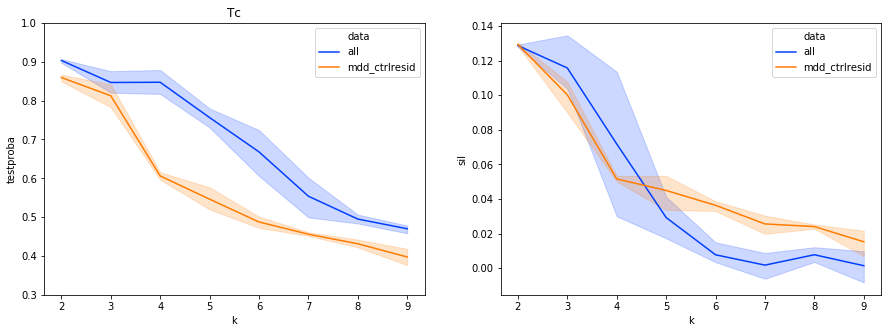

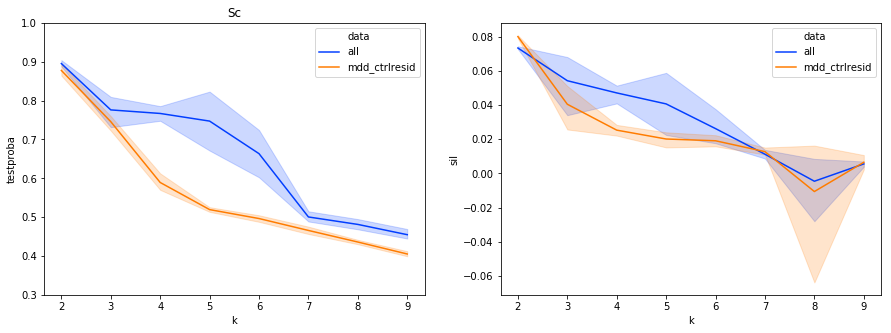

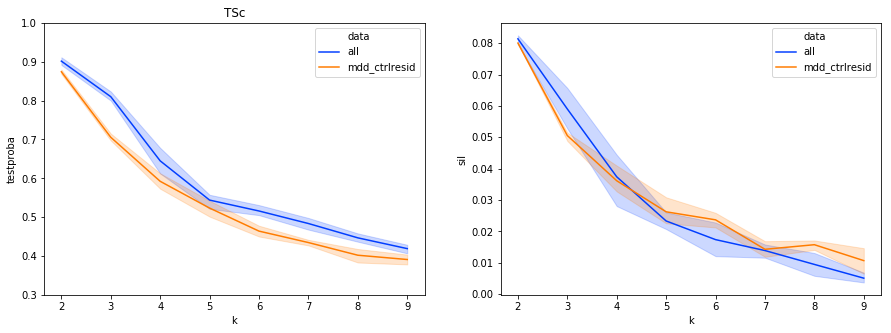

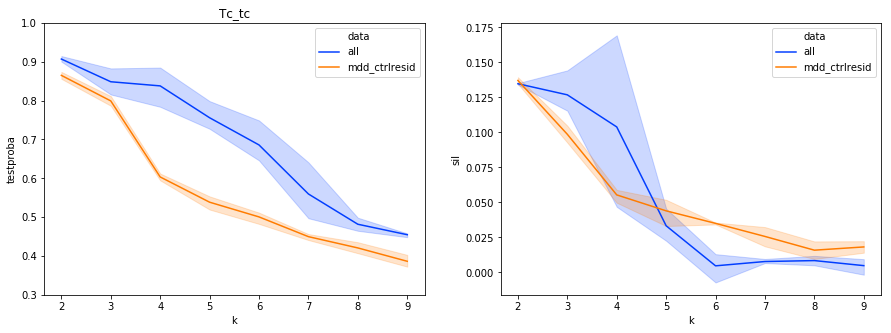

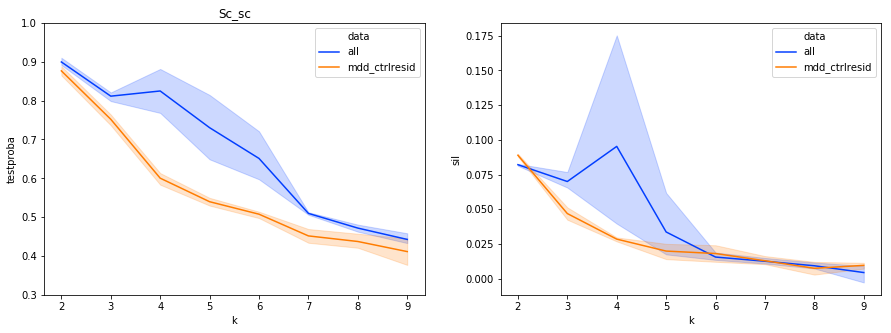

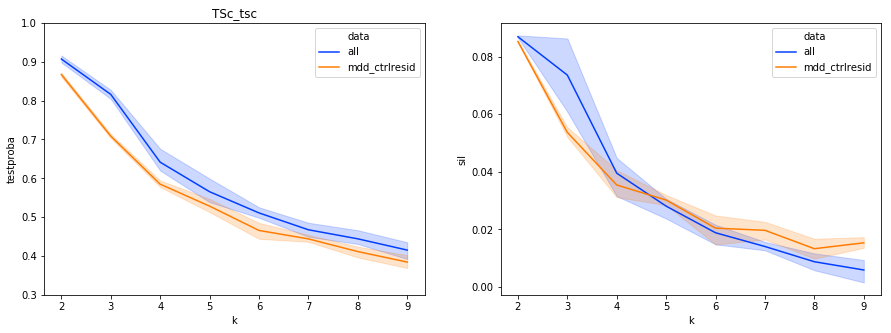

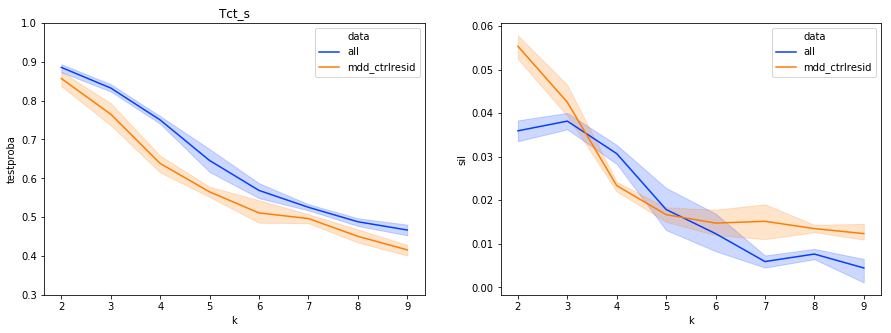

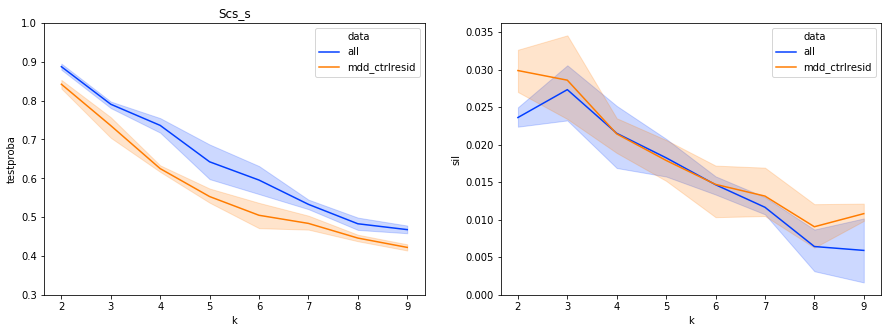

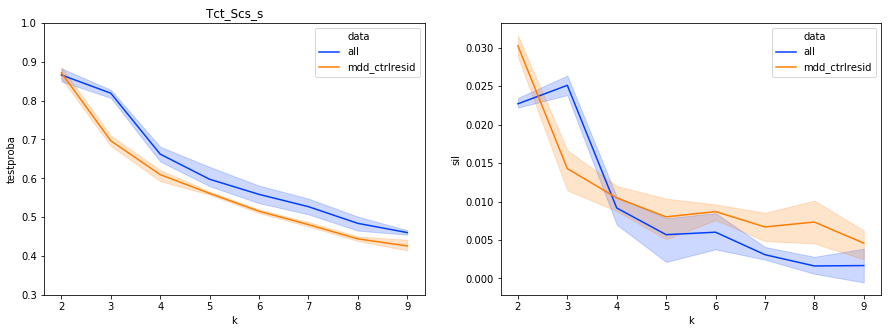

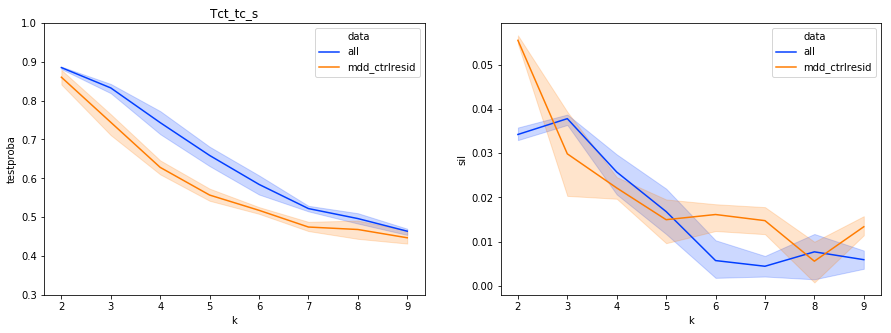

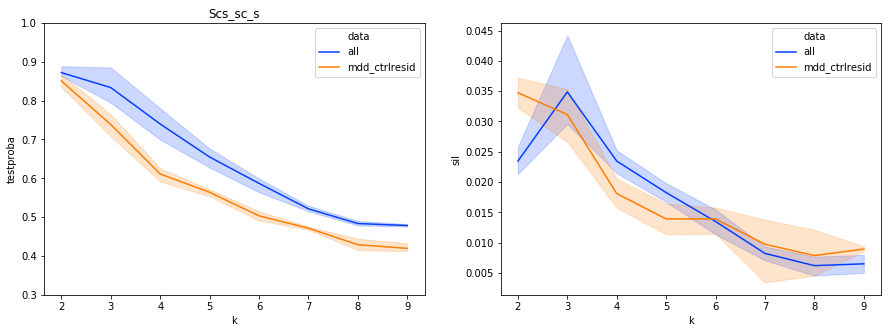

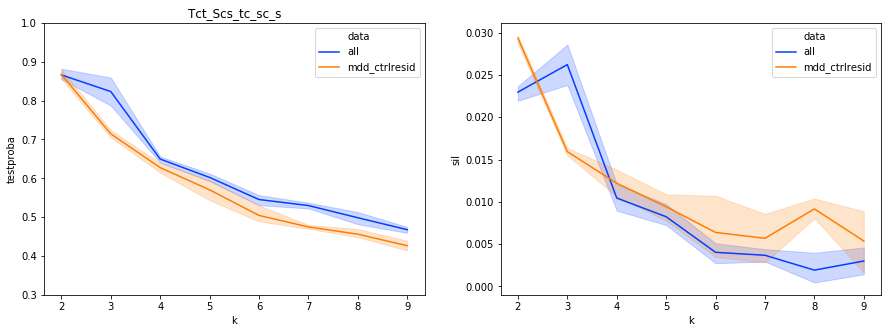

In [96]:
for s in range(12):
    fig = plt.figure(figsize=[15,5])
    df2=df[df['set']==sets[s]]
    plt.subplot(1,2,1)
    sns.lineplot(y='testproba',x='k',hue='data',data=df2, palette='bright')
    plt.ylim([0.3,1])
    plt.title(sets[s])
    plt.subplot(1,2,2)
    sns.lineplot(y='sil',x='k',hue='data',data=df2, palette='bright')
    plt.show()

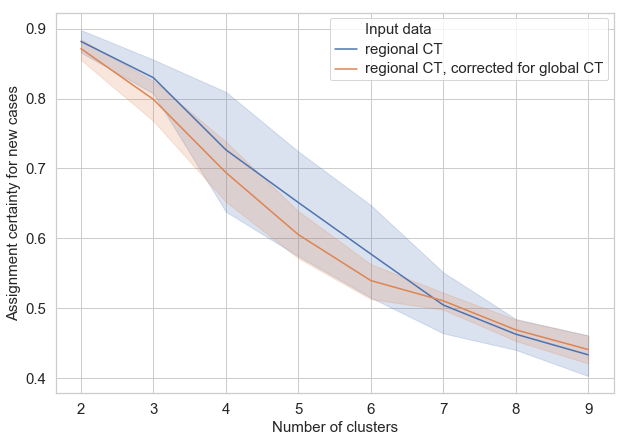

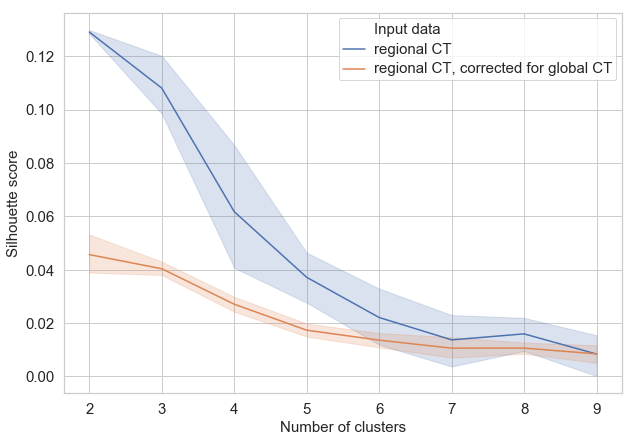

In [215]:
df3=df[df['set']=='Tc'].append(df[df['set']=='Tct_s'])
df3['set']=df3['set'].replace({'Tc':'regional CT','Tct_s':'regional CT, corrected for global CT'})
df3['Input data']= df3['set']
df3['Number of clusters']= df3['k']
df3['Assignment certainty for new cases']= df3['testproba']
df3['Silhouette score']= df3['sil']

fig,ax1=plt.subplots(figsize=[10,7])
ax1 = sns.lineplot(x='Number of clusters', hue='Input data', y='Assignment certainty for new cases',data=df3)
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels() ):
    item.set_fontsize(15)
plt.setp(ax1.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax1.get_legend().get_title(), fontsize='17') # for legend title
plt.show()


fig,ax2=plt.subplots(figsize=[10,7])
ax2 = sns.lineplot(x='Number of clusters', hue='Input data', y='Silhouette score',data=df3)
for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels() ):
    item.set_fontsize(15)
plt.setp(ax2.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax2.get_legend().get_title(), fontsize='17') # for legend title
plt.show()

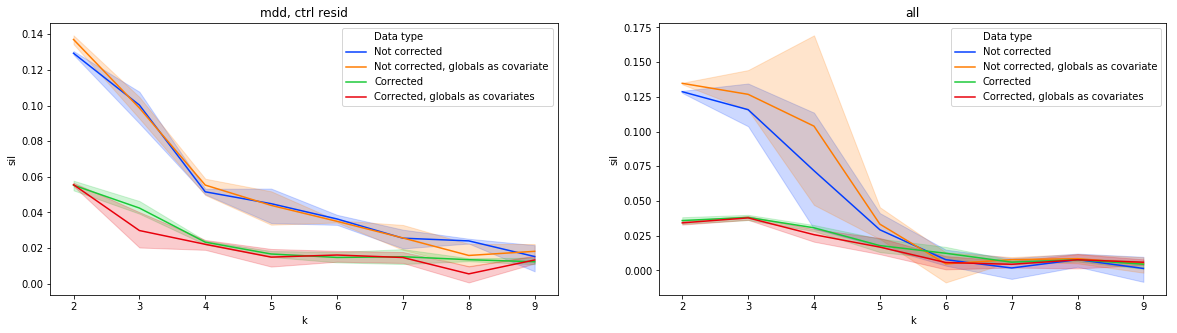

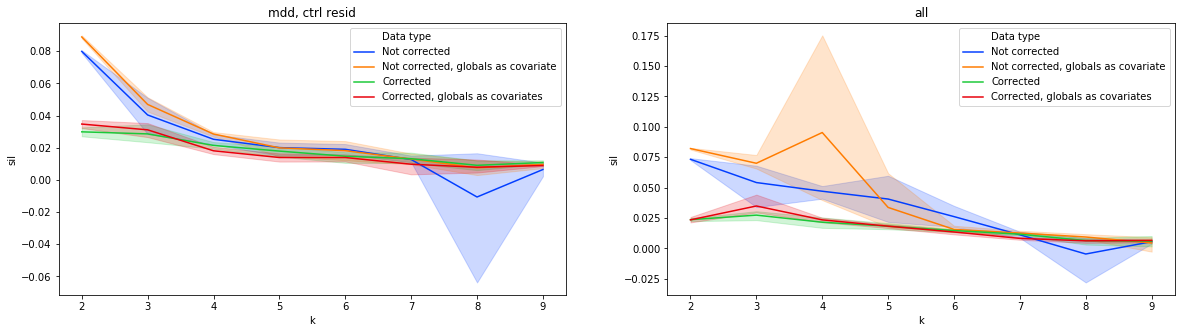

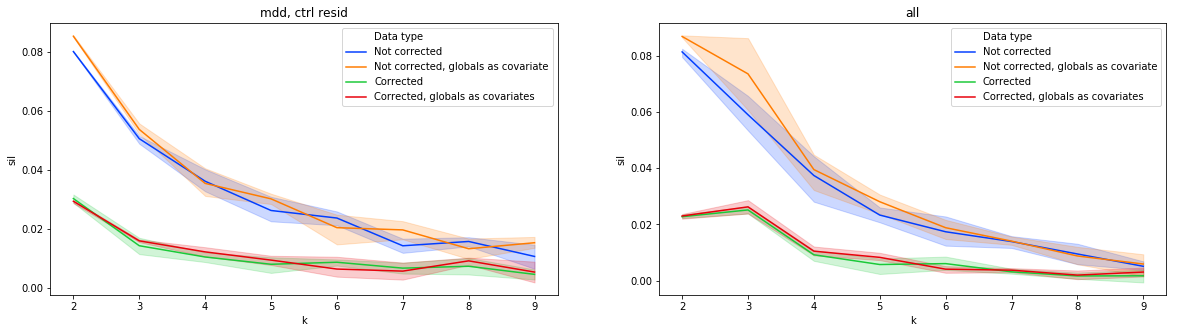

In [99]:
# plot all thickness lines
a=[0,3,6,9]
df3=df
df3['res_cov']=df3['res_cov'].replace({0:'Not corrected',1:'Not corrected, globals as covariate',2:'Corrected',3:'Corrected, globals as covariates'})
df3['Data type'] = df3['res_cov']
for mod in range(3):
    fig=plt.figure(figsize=[20,5])
    
    #plt.subplot(1,4,1); plt.title('mdd, ctrl resid'); plt.ylim([0.3,1])
    #df2=df[(df['mod']==mod) & (df['data']=='mdd_ctrlresid')]
    #sns.lineplot(y='testproba',x='k',hue='res_cov',data=df2, palette='bright')

    #plt.subplot(1,4,2); plt.title('all'); plt.ylim([0.3,1])
    #df2=df[(df['mod']==mod) & (df['data']=='all')]
    #sns.lineplot(y='testproba',x='k',hue='res_cov',data=df2, palette='bright')   
    
    plt.subplot(1,2,1); plt.title('mdd, ctrl resid'); 
    df2=df3[(df['mod']==mod) & (df3['data']=='mdd_ctrlresid')]
    sns.lineplot(y='sil',x='k',hue='Data type',data=df2, palette='bright')

    plt.subplot(1,2,2); plt.title('all'); 
    df2=df3[(df3['mod']==mod) & (df3['data']=='all')]
    sns.lineplot(y='sil',x='k',hue='Data type',data=df2, palette='bright')  
        
    plt.show()

MDD
[[1. 2. 0.]
 [0. 2. 0.]
 [2. 1. 0.]
 [0. 0. 0.]]
anova p=0.03796975463996757 for sex_pheno
anova p=0.0278008811215631 for site_pheno
anova p=1.2579101234789483e-05 for venla
anova p=1.0592902593989945e-07 for mridate
anova p=0.01415529698483722 for venla_u_date
anova p=0.042894168789971696 for hmdfu_2
anova p=0.012345805605062108 for hmdfu_3
anova p=0.004484049509031992 for hmdfu_4


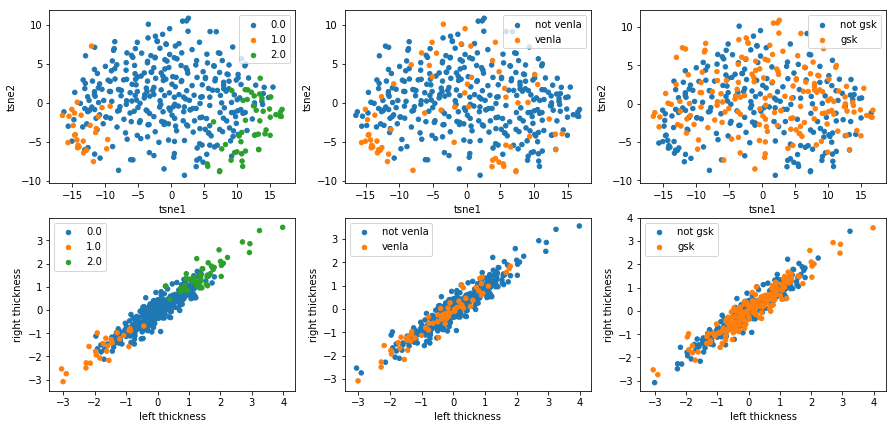

ALL
[[2. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 2. 1. 0.]
 [0. 1. 2. 0.]]


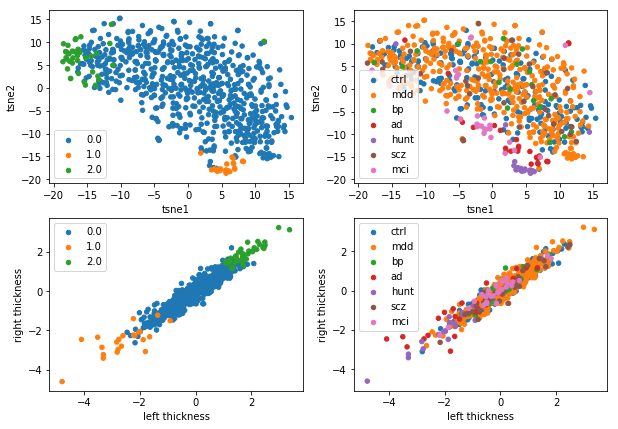

In [87]:
clusassigmdd, clusassigall, correspclus_mdd, correspclus_all = pplotclussol(0,4,3, 5,1)
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s0_c4.csv', clusassigall, delimiter=',', header='header')
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s0_c3.csv', clusassigmdd, delimiter=',', header='header')

In [220]:
clusassigmdd=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s0_c3.csv')
clusassiall=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s0_c4.csv')

with open((mdd_datadir + sets[0] + '_ctrl.csv'), "r") as f:
    mdd_ctrl_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
with open((all_savedir + sets[0] + '_ctrl.csv'), "r") as f:
    all_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)

normsample = all_Tc[np.where(clusassiall==2)[0],:]
Tcvector = mdd_ctrl_Tc[np.where(clusassigmdd==2)[0],:]
thick_v = np.linspace(68, 67 + 68, 68).astype(int)
subc_v = np.append(np.linspace(137, 143, 7), np.linspace(145, 151, 7)).astype(int)
Tclabels = labels[np.concatenate([thick_v, subc_v])]
plot_sig_against_norm(Tclabels, normsample, Tcvector)

no significant differences between samples


In [238]:
np.corrcoef(correspclus_all[1],correspclus_mdd[1])

array([[1.       , 0.6197785],
       [0.6197785, 1.       ]])

MDD
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 2. 0.]
 [0. 2. 0.]]
anova p=2.109373327672329e-05 for site_pheno
anova p=0.02024867472787119 for hmsum00
anova p=0.017201049172327964 for hmdi1_00
anova p=0.024713515418946813 for hmdi2_00
anova p=0.02047013176658963 for hmdi3_00
anova p=0.01478833388569383 for hmdi20_00
anova p=0.006532285828516953 for hmdi20_mri
anova p=3.0506909974864622e-09 for venla
anova p=0.01251118875522374 for gsk
anova p=6.893061209391653e-08 for mridate
anova p=0.001281469928292588 for venla_u_date
anova p=0.007053341394649406 for hmdfu_11
anova p=0.006601364372481984 for hmdfu_12
anova p=0.006887550095206824 for hmdfu_13
anova p=0.007439276863766817 for hmdfu_14
anova p=0.01464103367290902 for hmdfu_15


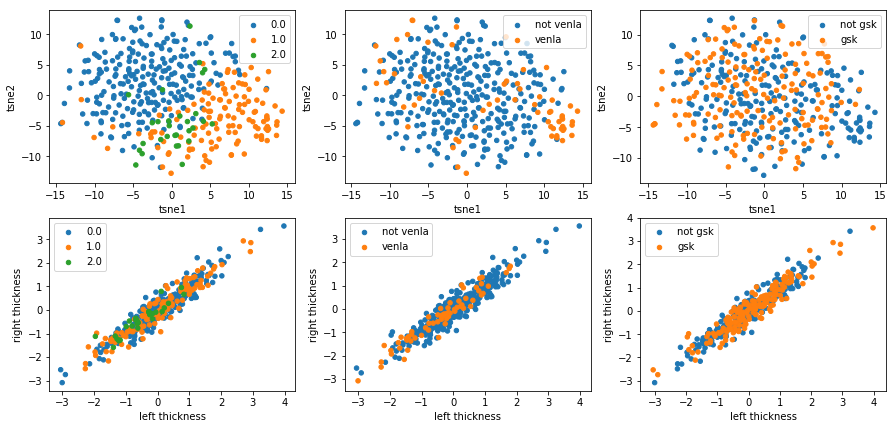

ALL
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
anova p=1.4413177770180906e-12 for age


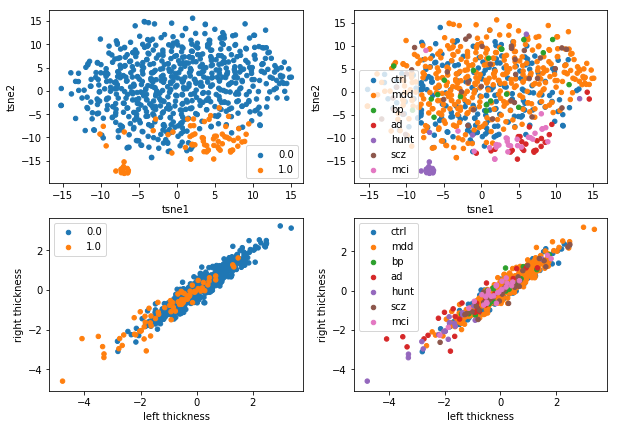

In [90]:
clusassigmdd, clusassigall = pplotclussol(6,3,3, 5,1)
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s6_c3.csv', clusassigall, delimiter=',', header='header')
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s6_c3.csv', clusassigmdd, delimiter=',', header='header')

MDD
[[0. 1. 0. 0. 2. 3. 4.]
 [4. 1. 0. 2. 5. 3. 0.]
 [1. 5. 0. 3. 3. 2. 0.]
 [1. 0. 0. 3. 0. 4. 0.]]
anova p=0.021970027020574823 for ICV
anova p=2.1416142389196835e-06 for site_pheno
anova p=0.014969451903144776 for mars
anova p=2.4350940772200985e-11 for venla
anova p=5.751254355444937e-12 for mridate
anova p=2.888403798672088e-06 for venla_u_date
anova p=0.041706188484854474 for hmdfu_4
anova p=0.0306066586645696 for hmdfu_10
anova p=0.0009362948338051734 for hmdfu_11
anova p=0.0011797284086140585 for hmdfu_12
anova p=0.0004991609942720731 for hmdfu_13
anova p=0.0001430355957938601 for hmdfu_14
anova p=0.0004483279919464959 for hmdfu_15
anova p=0.0024292470334698786 for hmdfu_17


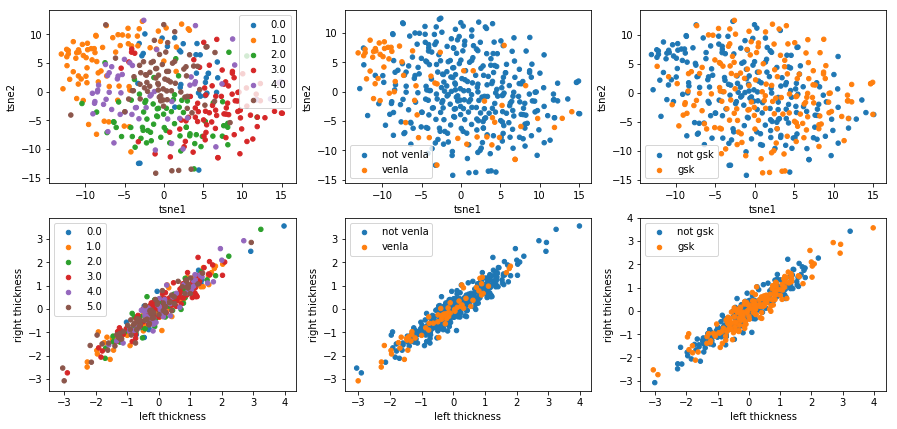

ALL
conflict!! 0 4 3 7
conflict!! 2 1 3 7
conflict!! 3 7 0 4
conflict!! 3 7 2 1
[[1. 0. 0. 0. 2. 0. 0. 3.]
 [2. 0. 3. 0. 0. 0. 0. 1.]
 [0. 2. 3. 4. 0. 0. 1. 0.]
 [2. 0. 3. 4. 0. 1. 0. 1.]]
anova p=0.0002706896152728501 for ICV
anova p=1.293931992397434e-10 for age
anova p=0.03622682940390245 for sex


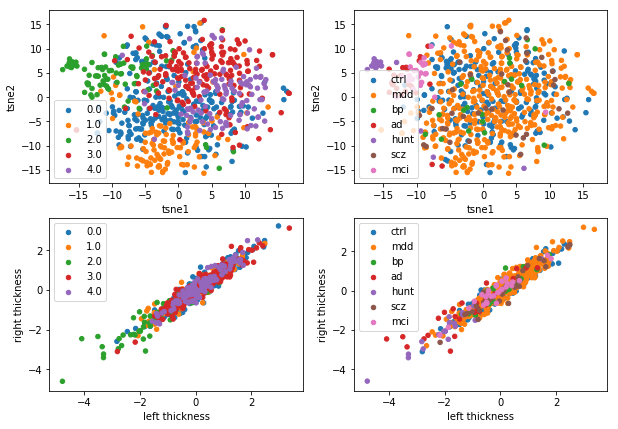

In [91]:
clusassigmdd, clusassigall = pplotclussol(6,8,7, 5,1)
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s6_c8.csv', clusassigall, delimiter=',', header='header')
#savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s6_c7.csv', clusassigmdd, delimiter=',', header='header')

In [250]:
# make dataframe wiht clinical info and brain age info

clin = pd.read_csv(r'/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/clin.csv');

clusassigmdd=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s0_c3.csv')
clin['assig']=clusassigmdd

clusassigmdd2=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s6_c7.csv')
clin['assig2']=clusassigmdd2

clusassigmdd3=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s6_c3.csv')
clin['assig3']=clusassigmdd3

Xinit = pd.read_csv(r'/Users/lee_jollans/Projects/MARS_GSK_project/data/alldatacollect/casedata.csv',header=None);
clin['brainage'] = np.vstack(Xinit.values[1:,162]).astype(np.float)
clin['brainPAD'] = np.vstack(Xinit.values[1:,157]).astype(np.float)-np.vstack(Xinit.values[1:,162]).astype(np.float)
print(list(clin))

# make week-by-week hdrs summary score dataframe
hmbl=clin['hmsummri'].to_numpy()
hmfus=np.full([398,8],np.nan)
for n in range(8):
    hmfus[:,n]=clin['hmdfu_' + str(n+1)].to_numpy()
venla=clin['venla'].to_numpy()

df = pd.DataFrame({'sub': np.linspace(1,398,398),
                   'venla': clin['venla'],
                   'clus': clin['assig'],
                   'clus2': clin['assig2'],
                   'clus3': clin['assig3'],
                   'slope': clin['slope'],
                   'hmsum': clin['hmsum00'],
                   'week': np.full([398],0),
                  'brainPAD':clin['brainPAD']},
                  columns=['sub', 'venla', 'clus','clus2','clus3', 'slope','hmsum', 'week', 'brainPAD'])
for week in range(8):
    tmp_df = pd.DataFrame({'sub': np.linspace(1,398,398),
                           'venla': clin['venla'],
                           'clus': clin['assig'],
                           'clus2': clin['assig2'],
                           'clus3': clin['assig3'],
                           'slope': clin['slope'],
                           'hmsum': clin['hmdfu_' + str(week+1)],
                           'week': np.full([398],week+1),
                          'brainPAD':clin['brainPAD']},
                          columns=['sub', 'venla', 'clus','clus2', 'clus3','slope','hmsum', 'week', 'brainPAD'])
    df = df.append(tmp_df)
df.describe()

['ICV', 'consensusage_pheno', 'sex_pheno', 'site_pheno', 'scanstudy', 'bdi00', 'hmsum00', 'hmsummri', 'hmdi1_00', 'hmdi2_00', 'hmdi3_00', 'hmdi4_00', 'hmdi5_00', 'hmdi6_00', 'hmdi7_00', 'hmdi8_00', 'hmdi9_00', 'hmdi10_00', 'hmdi11_00', 'hmdi12_00', 'hmdi13_00', 'hmdi14_00', 'hmdi15_00', 'hmdi16_00', 'hmdi17_00', 'hmdi18_00', 'hmdi19_00', 'hmdi20_00', 'hmdi21_00', 'hmdi1_mri', 'hmdi2_mri', 'hmdi3_mri', 'hmdi4_mri', 'hmdi5_mri', 'hmdi6_mri', 'hmdi7_mri', 'hmdi8_mri', 'hmdi9_mri', 'hmdi10_mri', 'hmdi11_mri', 'hmdi12_mri', 'hmdi13_mri', 'hmdi14_mri', 'hmdi15_mri', 'hmdi16_mri', 'hmdi17_mri', 'hmdi18_mri', 'hmdi19_mri', 'hmdi20_mri', 'hmdi21_mri', 'firstep', 'k_psychot', 'sui', 'stai_aktuell', 'stai_habituell', 'HAMA_somatischeangst', 'HAMA_psychischeangst', 'mars', 'venla', 'gsk', 'slope', 'ind_slope', 'cluster', 'mridate', 'datum_00', 'u_date', 'venla_u_date', 'hmdfu_1', 'hmdfu_2', 'hmdfu_3', 'hmdfu_4', 'hmdfu_5', 'hmdfu_6', 'hmdfu_7', 'hmdfu_8', 'hmdfu_9', 'hmdfu_10', 'hmdfu_11', 'hmdfu_

sub        venla         clus        clus2        clus3  \
count  3582.000000  3582.000000  3582.000000  3582.000000  3582.000000   
mean    199.500000     0.160804     0.309045     2.713568     0.462312   
std     114.908382     0.367401     0.674440     1.575266     0.628027   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     100.000000     0.000000     0.000000     1.000000     0.000000   
50%     199.500000     0.000000     0.000000     3.000000     0.000000   
75%     299.000000     0.000000     0.000000     4.000000     1.000000   
max     398.000000     1.000000     2.000000     5.000000     2.000000   

             slope        hmsum         week     brainPAD  
count  1710.000000  1545.000000  3582.000000  2907.000000  
mean     -0.136352    16.700647     4.000000    -1.353746  
std       0.132651     7.316026     2.582349     8.690036  
min      -0.467462     0.000000     0.000000   -28.320000  
25%      -0.229702    12.000000     2.000000    -7.130000  
50%      -0.102806    16.000000     4.000000    -1.620000  
75%      -0.059577    22.000000     6.000000     4.550000  
max      -0.019847    41.000000     8.000000    30.640000

In [253]:
def returnanova(var1, var2):
    # anova for slope
    results = ols(var1 + '~ C(' + var2 + ')', data=clin).fit()
    aov_table = sm.stats.anova_lm(results, typ=2)
    p = aov_table['PR(>F)'][0]
    return p

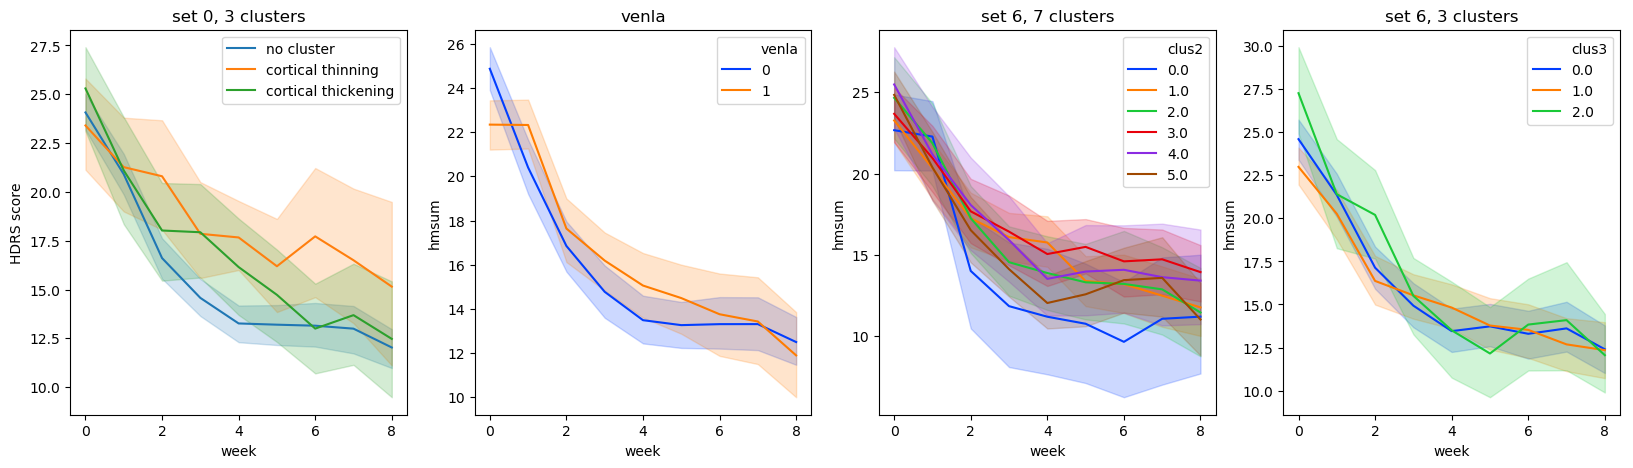

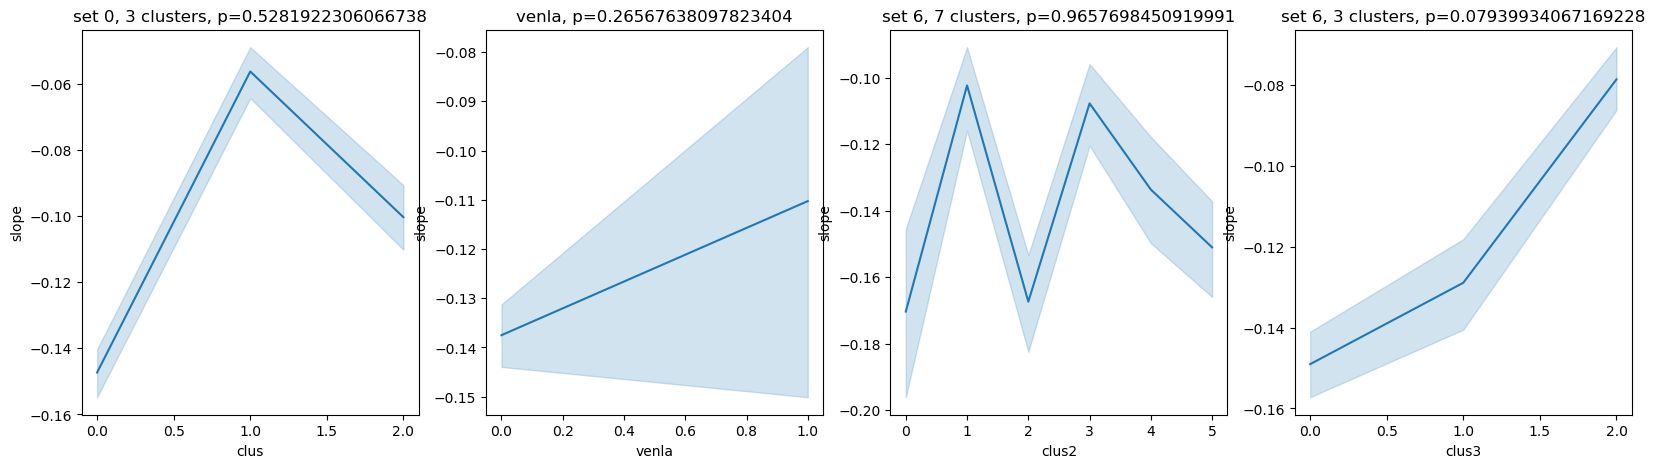

In [358]:
fig=plt.figure(figsize=[20,5])

plt.subplot(1,4,1)
df2=df#[df['clus']!=2]
df2['Cluster']=df2['clus']
df2['HDRS score']=df2['hmsum']
df2['Cluster']=df2['Cluster'].replace({0:'No cluster',1:'Cortical thinning',2:'Cortical thickening'})
df3=df2[df2['Cluster']=='No cluster']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
df3=df2[df2['Cluster']=='Cortical thinning']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
df3=df2[df2['Cluster']=='Cortical thickening']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
plt.legend(['no cluster','cortical thinning','cortical thickening'])

plt.title('set 0, 3 clusters')
plt.subplot(1,4,2); plt.title('venla')
sns.lineplot(y='hmsum',x='week',hue='venla',data=df, palette='bright')
plt.subplot(1,4,3); plt.title('set 6, 7 clusters')
sns.lineplot(y='hmsum',x='week',hue='clus2',data=df, palette='bright')
plt.subplot(1,4,4); plt.title('set 6, 3 clusters')
sns.lineplot(y='hmsum',x='week',hue='clus3',data=df, palette='bright')
plt.show()

fig=plt.figure(figsize=[20,5])
plt.subplot(1,4,1); plt.title('set 0, 3 clusters, p=' + str(returnanova('assig', 'slope'))) 
sns.lineplot(y='slope',x='clus',data=df, palette='bright')
plt.subplot(1,4,2); plt.title('venla, p=' + str(returnanova('venla', 'slope'))) 
sns.lineplot(y='slope',x='venla',data=df, palette='bright')
plt.subplot(1,4,3); plt.title('set 6, 7 clusters, p=' + str(returnanova('assig2', 'slope'))) 
sns.lineplot(y='slope',x='clus2',data=df, palette='bright')
plt.subplot(1,4,4); plt.title('set 6, 3 clusters, p=' + str(returnanova('assig3', 'slope'))) 
sns.lineplot(y='slope',x='clus3',data=df, palette='bright')
plt.show()

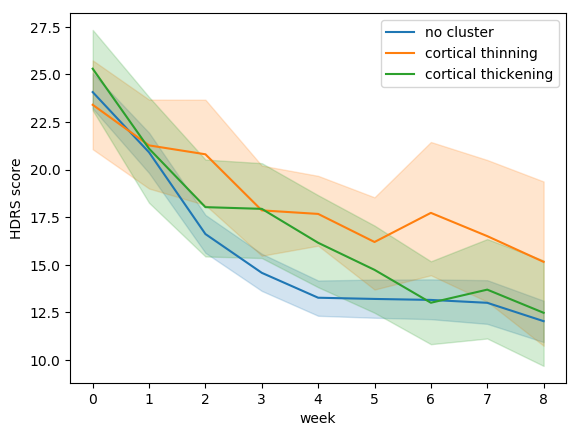

In [359]:
df2=df#[df['clus']!=2]
df2['Cluster']=df2['clus']
df2['HDRS score']=df2['hmsum']
df2['Cluster']=df2['Cluster'].replace({0:'No cluster',1:'Cortical thinning',2:'Cortical thickening'})
df3=df2[df2['Cluster']=='No cluster']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
df3=df2[df2['Cluster']=='Cortical thinning']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
df3=df2[df2['Cluster']=='Cortical thickening']
sns.lineplot(y='HDRS score',x='week',data=df3, palette='bright')
plt.legend(['no cluster','cortical thinning','cortical thickening'])

[243, 126, 29]


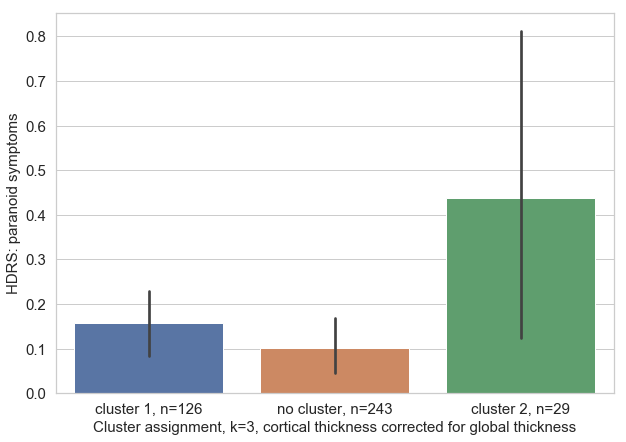

In [178]:
print([len(np.where(clusassigmdd3==i)[0]) for i in range(3)])
clin['assig3']=clin['assig3'].replace({0: 'no cluster, n=243',1: 'cluster 1, n=126',2: 'cluster 2, n=29'})
clin['Cluster assignment, k=3, cortical thickness corrected for global thickness'] = clin['assig3']
clin['HDRS: paranoid symptoms'] = clin['hmdi20_mri']

fig, ax=plt.subplots(1,1,figsize=[10,7]); 
ax=sns.barplot(x='Cluster assignment, k=3, cortical thickness corrected for global thickness',y='HDRS: paranoid symptoms', data=clin)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [326]:
def conmat_pct(a,b):
    conmat1 = contingency_matrix(a,b)
    conmat1pct = np.zeros(shape=conmat1.shape)
    for n in range(conmat1.shape[0]):
        conmat1pct[n,:]=(conmat1[n,:]*100)/np.sum(conmat1[n,:])
    return conmat1, conmat1pct             

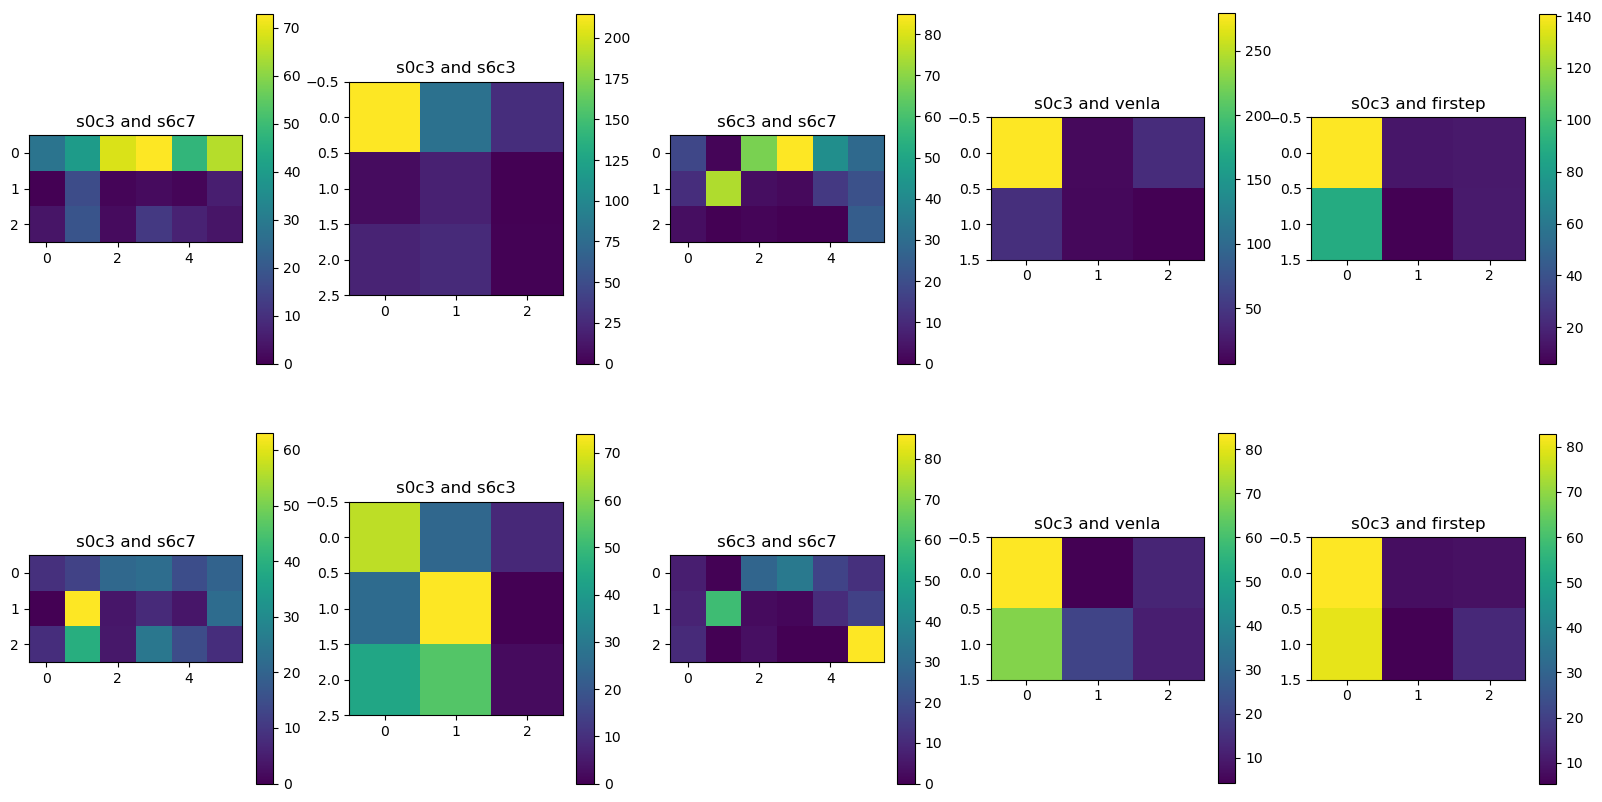

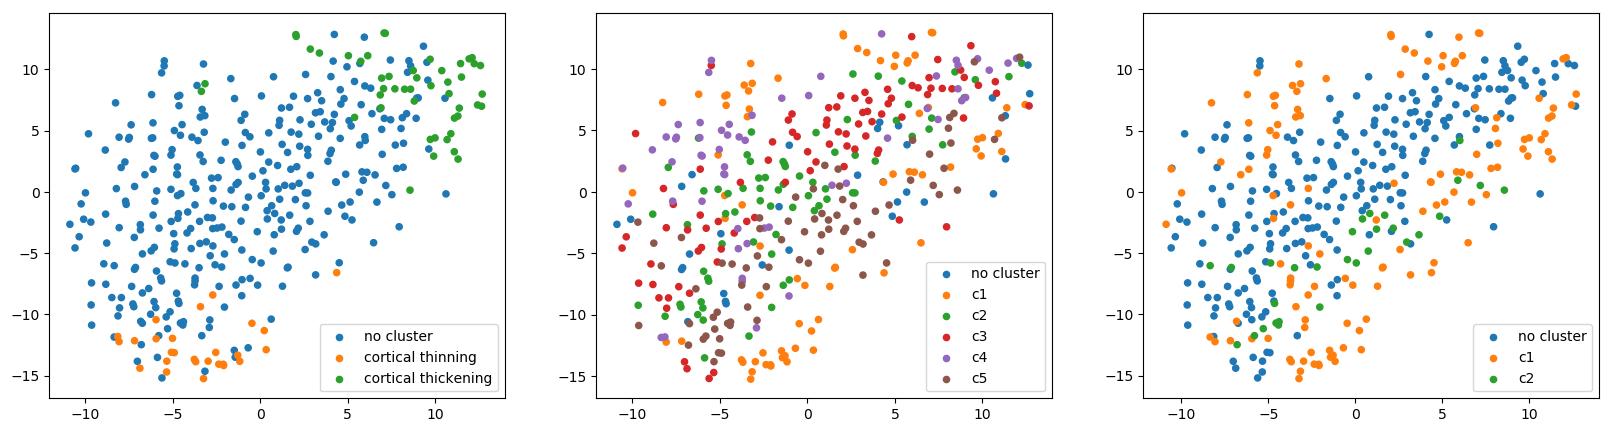

In [327]:
# are there consistent clusters across the 3 solutions? (s0c3, s6c7, s6c3)
plt.style.use('default')

conmat1, conmat1p = conmat_pct(clusassigmdd, clusassigmdd2)
conmat2, conmat2p = conmat_pct(clusassigmdd, clusassigmdd3)
conmat3, conmat3p = conmat_pct(clusassigmdd3, clusassigmdd2)
conmat4, conmat4p = conmat_pct(clin['venla'], clusassigmdd)
conmat5, conmat5p = conmat_pct(clin['firstep'], clusassigmdd)

fig=plt.figure(figsize=[20,10])
plt.subplot(2,5,1); plt.imshow(conmat1); plt.colorbar(); plt.title('s0c3 and s6c7')
plt.subplot(2,5,2); plt.imshow(conmat2); plt.colorbar(); plt.title('s0c3 and s6c3')
plt.subplot(2,5,3); plt.imshow(conmat3); plt.colorbar(); plt.title('s6c3 and s6c7')
plt.subplot(2,5,4); plt.imshow(conmat4); plt.colorbar(); plt.title('s0c3 and venla')
plt.subplot(2,5,5); plt.imshow(conmat5[:2,:]); plt.colorbar(); plt.title('s0c3 and firstep')
plt.subplot(2,5,6); plt.imshow(conmat1p); plt.colorbar(); plt.title('s0c3 and s6c7')
plt.subplot(2,5,7); plt.imshow(conmat2p); plt.colorbar(); plt.title('s0c3 and s6c3')
plt.subplot(2,5,8); plt.imshow(conmat3p); plt.colorbar(); plt.title('s6c3 and s6c7')
plt.subplot(2,5,9); plt.imshow(conmat4p); plt.colorbar(); plt.title('s0c3 and venla')
plt.subplot(2,5,10); plt.imshow(conmat5p[:2,:]); plt.colorbar(); plt.title('s0c3 and firstep')
plt.show()

with open((mdd_datadir + sets[0] + '_ctrl.csv'), "r") as f:
    mdd_ctrl_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
mdd_ctrl_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mdd_ctrl_Tc)

fig=plt.figure(figsize=[20,5])
ax1=plt.subplot(1,3,1); colorscatter(mdd_ctrl_tsne, clusassigmdd, np.ones(398)*4, ax1); plt.legend(['no cluster', 'cortical thinning', 'cortical thickening'])
ax2=plt.subplot(1,3,2); colorscatter(mdd_ctrl_tsne, clusassigmdd2, np.ones(398)*4, ax2); plt.legend(['no cluster', 'c1','c2','c3','c4','c5','c6' ])
ax3=plt.subplot(1,3,3); colorscatter(mdd_ctrl_tsne, clusassigmdd3, np.ones(398)*4, ax3); plt.legend(['no cluster', 'c1','c2'])
plt.show()

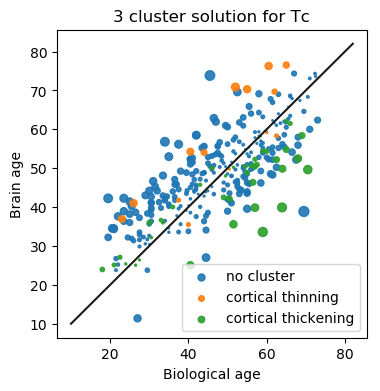


brainPAD and global CT:
N=323, r=0.44376767413359025

brainage and biological age:
N=323, r=0.5635932194218309


In [293]:
X=np.array([clin['consensusage_pheno'].to_numpy(),clin['brainage'].to_numpy()])
fig=plt.figure(figsize=[4,4]); ax1=plt.subplot(1,1,1)
colorscatter(X.T, clusassigmdd, abs(clin['brainPAD'].to_numpy())/3,ax1,0, aa=0.9, mm='o')
plt.legend(['no cluster','cortical thinning','cortical thickening'])
x=np.linspace(10,82,72)
plt.plot(x,x,'k-')
plt.xlabel('Biological age')
plt.ylabel('Brain age')
plt.title('3 cluster solution for Tc')
plt.show()

print('\nbrainPAD and global CT:'); corrwithnans(clin['brainPAD'].to_numpy(),np.mean(thick_mdd,axis=1))
print('\nbrainage and biological age:'); corrwithnans(clin['brainPAD'].to_numpy(),clin['consensusage_pheno'].to_numpy())

In [316]:
def anovas1(chk='hmsummri'):
    
    pv=returnanova(chk, 'venla')   
    p1=returnanova(chk, 'assig')
    p2=returnanova(chk, 'assig2')   
    p3=returnanova(chk, 'assig3')

    fig=plt.figure(figsize=[20,4])
    plt.subplot(1,4,1); sns.barplot(x='assig',y=chk, data=clin); plt.title(('s0c3, p=' + str(p1)))
    plt.subplot(1,4,2); sns.barplot(x='assig2',y=chk, data=clin); plt.title(('s6c7, p='+ str(p2)))
    plt.subplot(1,4,3); sns.barplot(x='assig3',y=chk, data=clin); plt.title(('s6c3, p='+ str(p3)))
    plt.subplot(1,4,4); sns.barplot(x='venla',y=chk, data=clin); plt.title(('venla, p='+ str(pv)))
    plt.show()


biological age anovas:


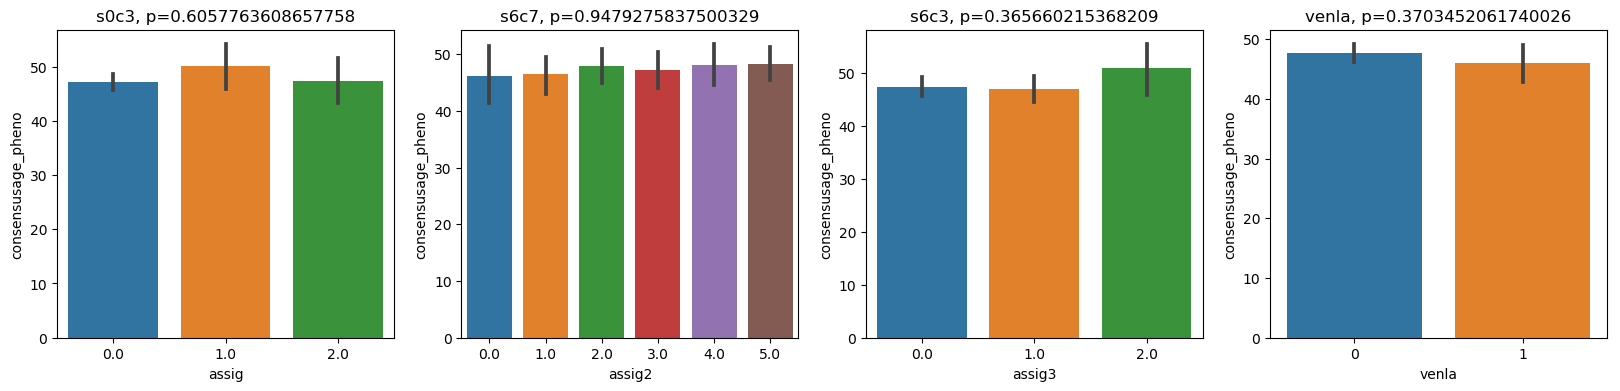


brainage anovas:


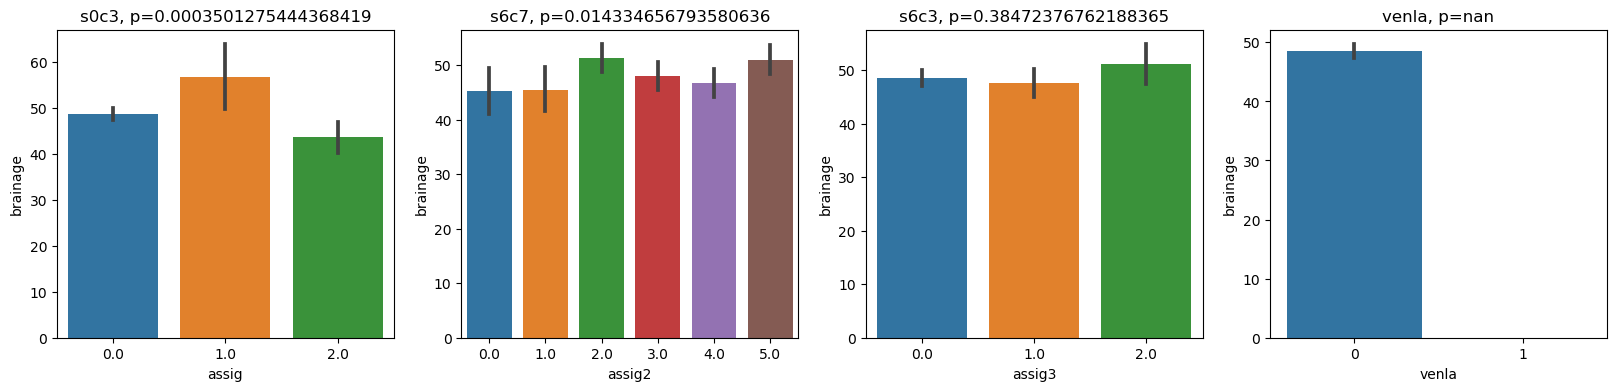


brainpad:


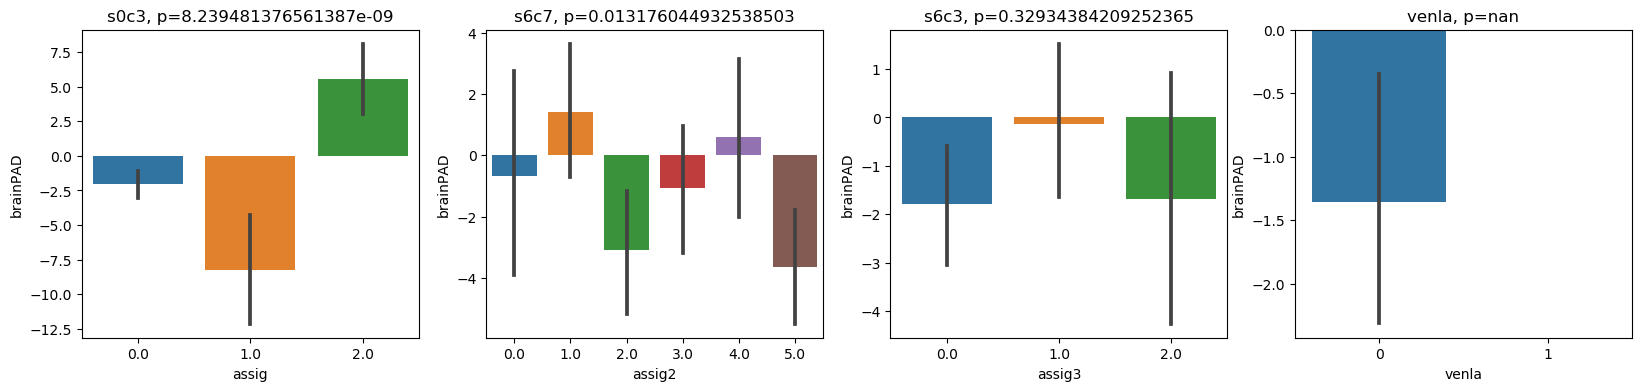

In [328]:
print('\nbiological age anovas:')
anovas1(chk='consensusage_pheno')
print('\nbrainage anovas:')
anovas1(chk='brainage')
print('\nbrainpad:')
anovas1(chk='brainPAD')


baseline hmd anovas:


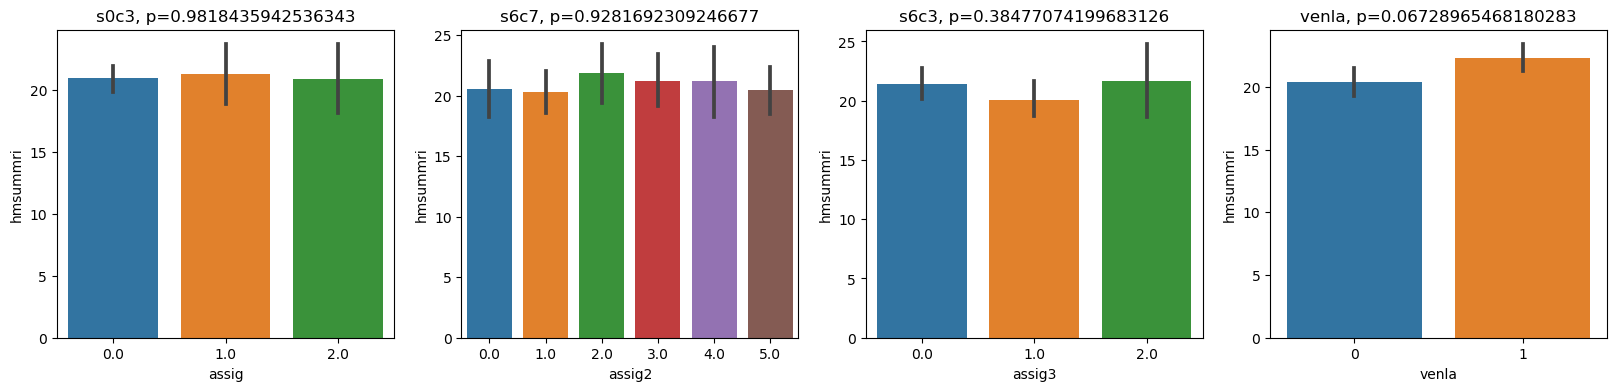


FU week 2 hmd anovas:


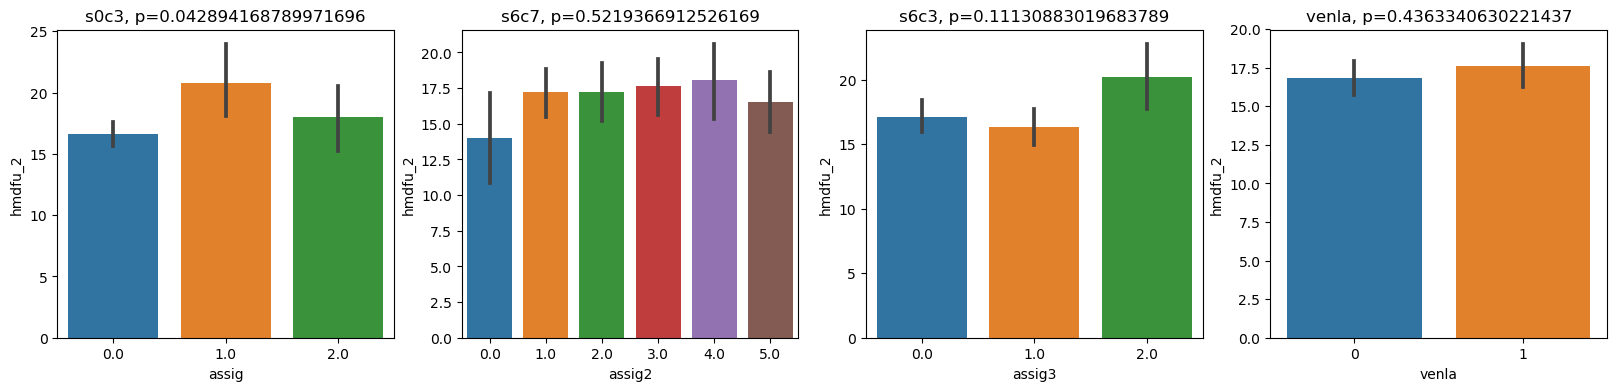


FU week 4 hmd anovas:


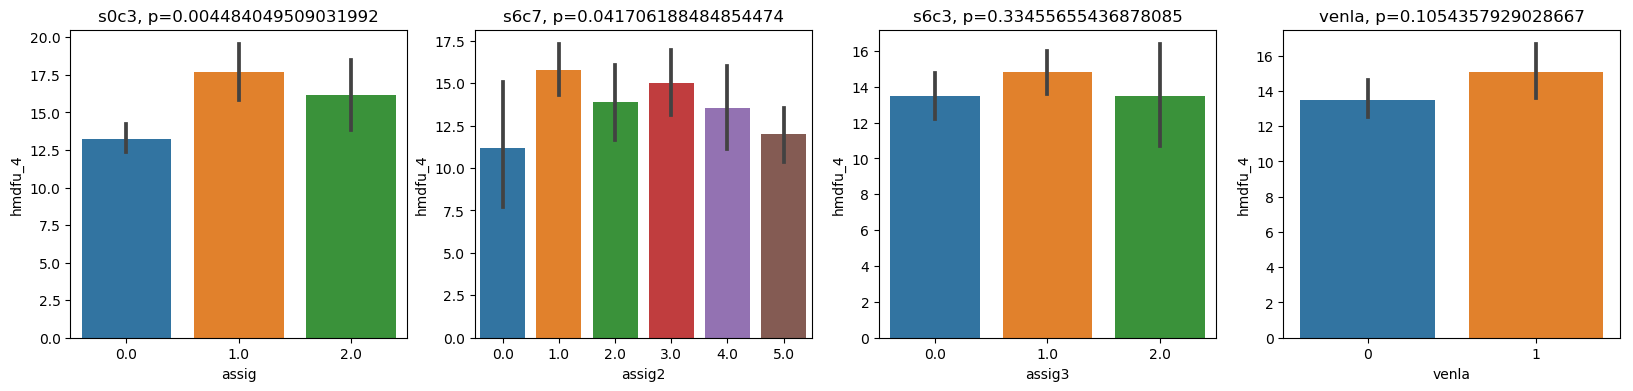


FU week 6 hmd anovas:


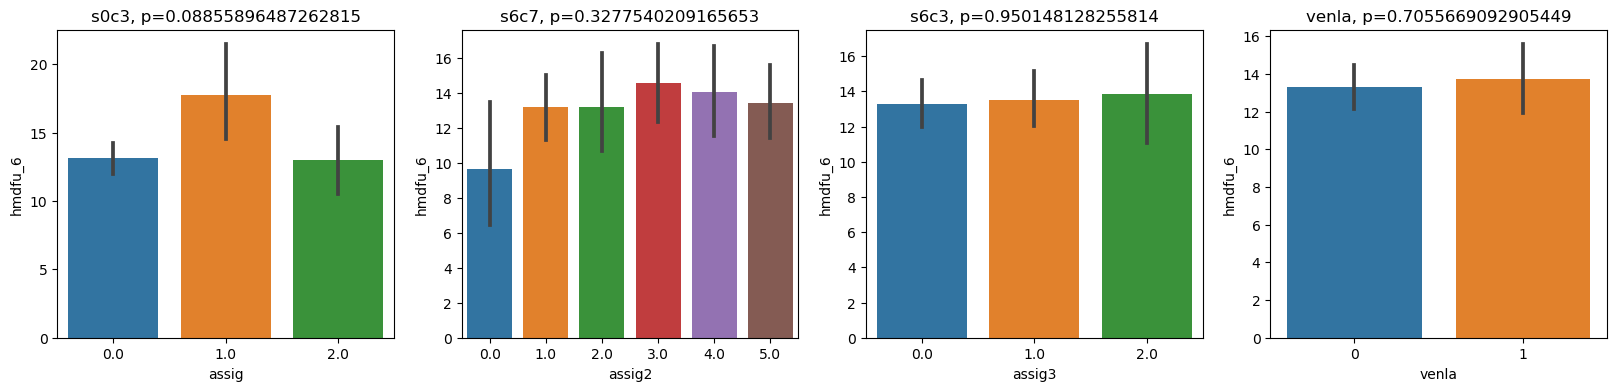

In [317]:
print('\nbaseline hmd anovas:')
anovas1(chk='hmsummri')
print('\nFU week 2 hmd anovas:')
anovas1(chk='hmdfu_2')
print('\nFU week 4 hmd anovas:')
anovas1(chk='hmdfu_4')
print('\nFU week 6 hmd anovas:')
anovas1(chk='hmdfu_6')


improvement model slope:


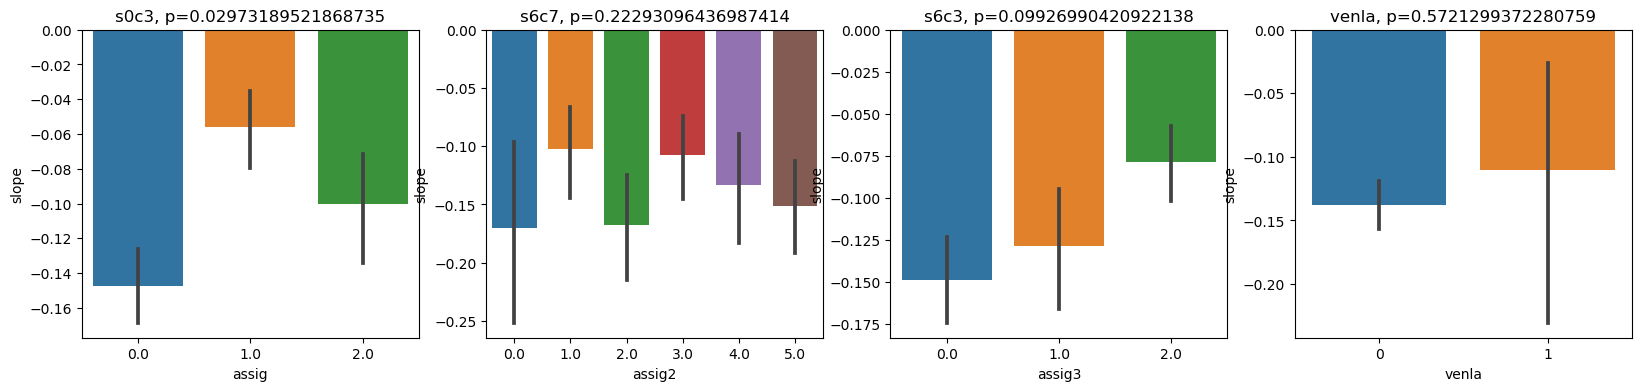


improvement individual slope:


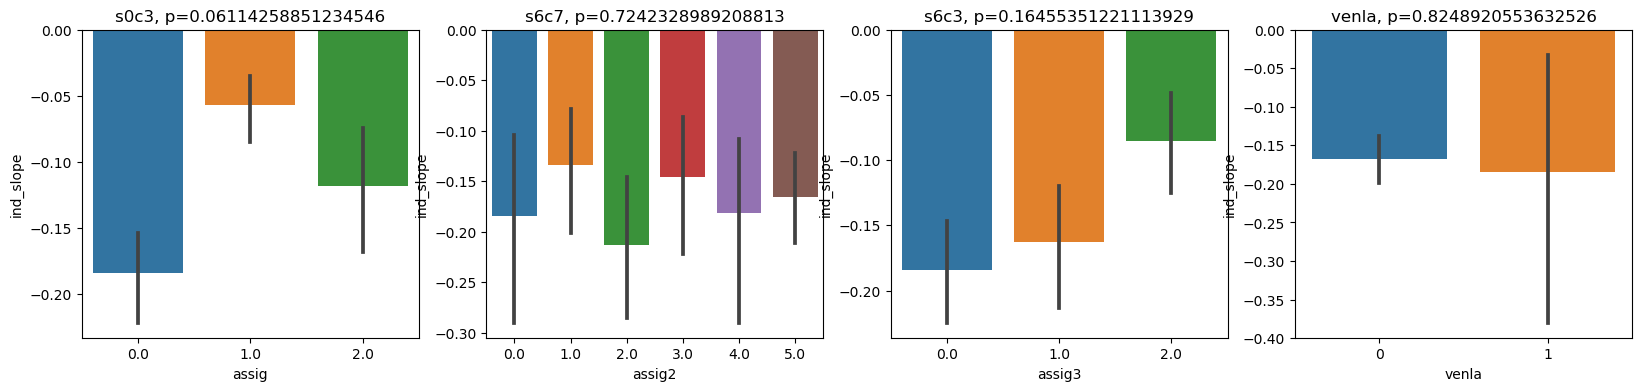


improvement cluster:


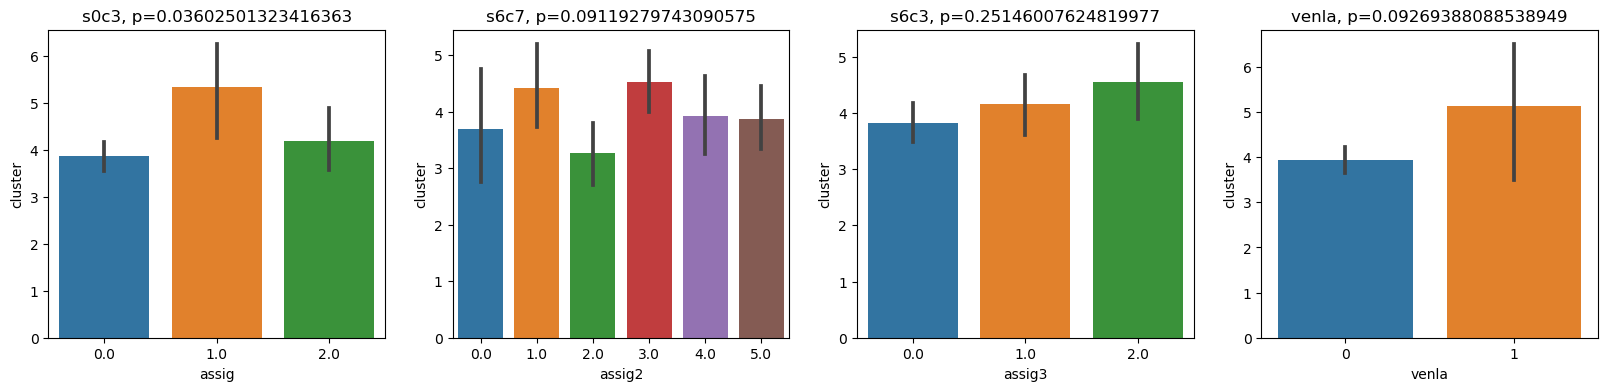

In [353]:
print('\nimprovement model slope:')
anovas1(chk='slope')
print('\nimprovement individual slope:')
anovas1(chk='ind_slope')
print('\nimprovement cluster:')
anovas1(chk='cluster')

In [303]:
with open((mdd_datadir + sets[0] + '_ctrl.csv'), "r") as f:
    mdd_ctrl_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
with open((all_savedir + sets[0] + '_ctrl.csv'), "r") as f:
    all_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
thick_v = np.linspace(68, 67 + 68, 68).astype(int)
subc_v = np.append(np.linspace(137, 143, 7), np.linspace(145, 151, 7)).astype(int)
Tclabels = labels[np.concatenate([thick_v, subc_v])]

In [25]:
plot_sig_against_norm( Tclabels, all_Tc[np.where(sampleidx==1)[0],:], mdd_ctrl_Tc)

no significant differences between samples


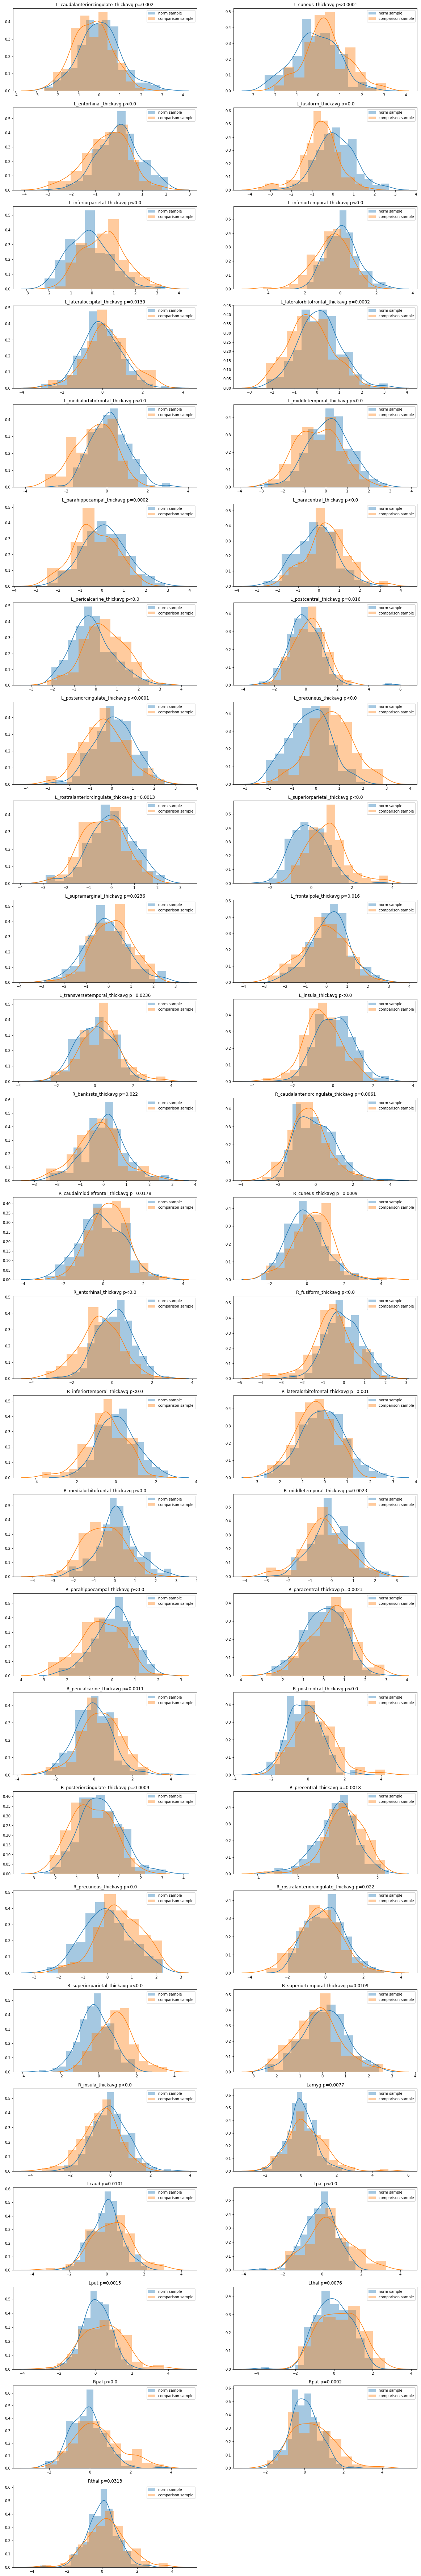

In [26]:
plot_sig_against_norm( Tclabels, all_Tc[np.where(sampleidx==1)[0],:], mdd_ctrl_Tc[np.where(clusassigmdd3==1)[0],:])

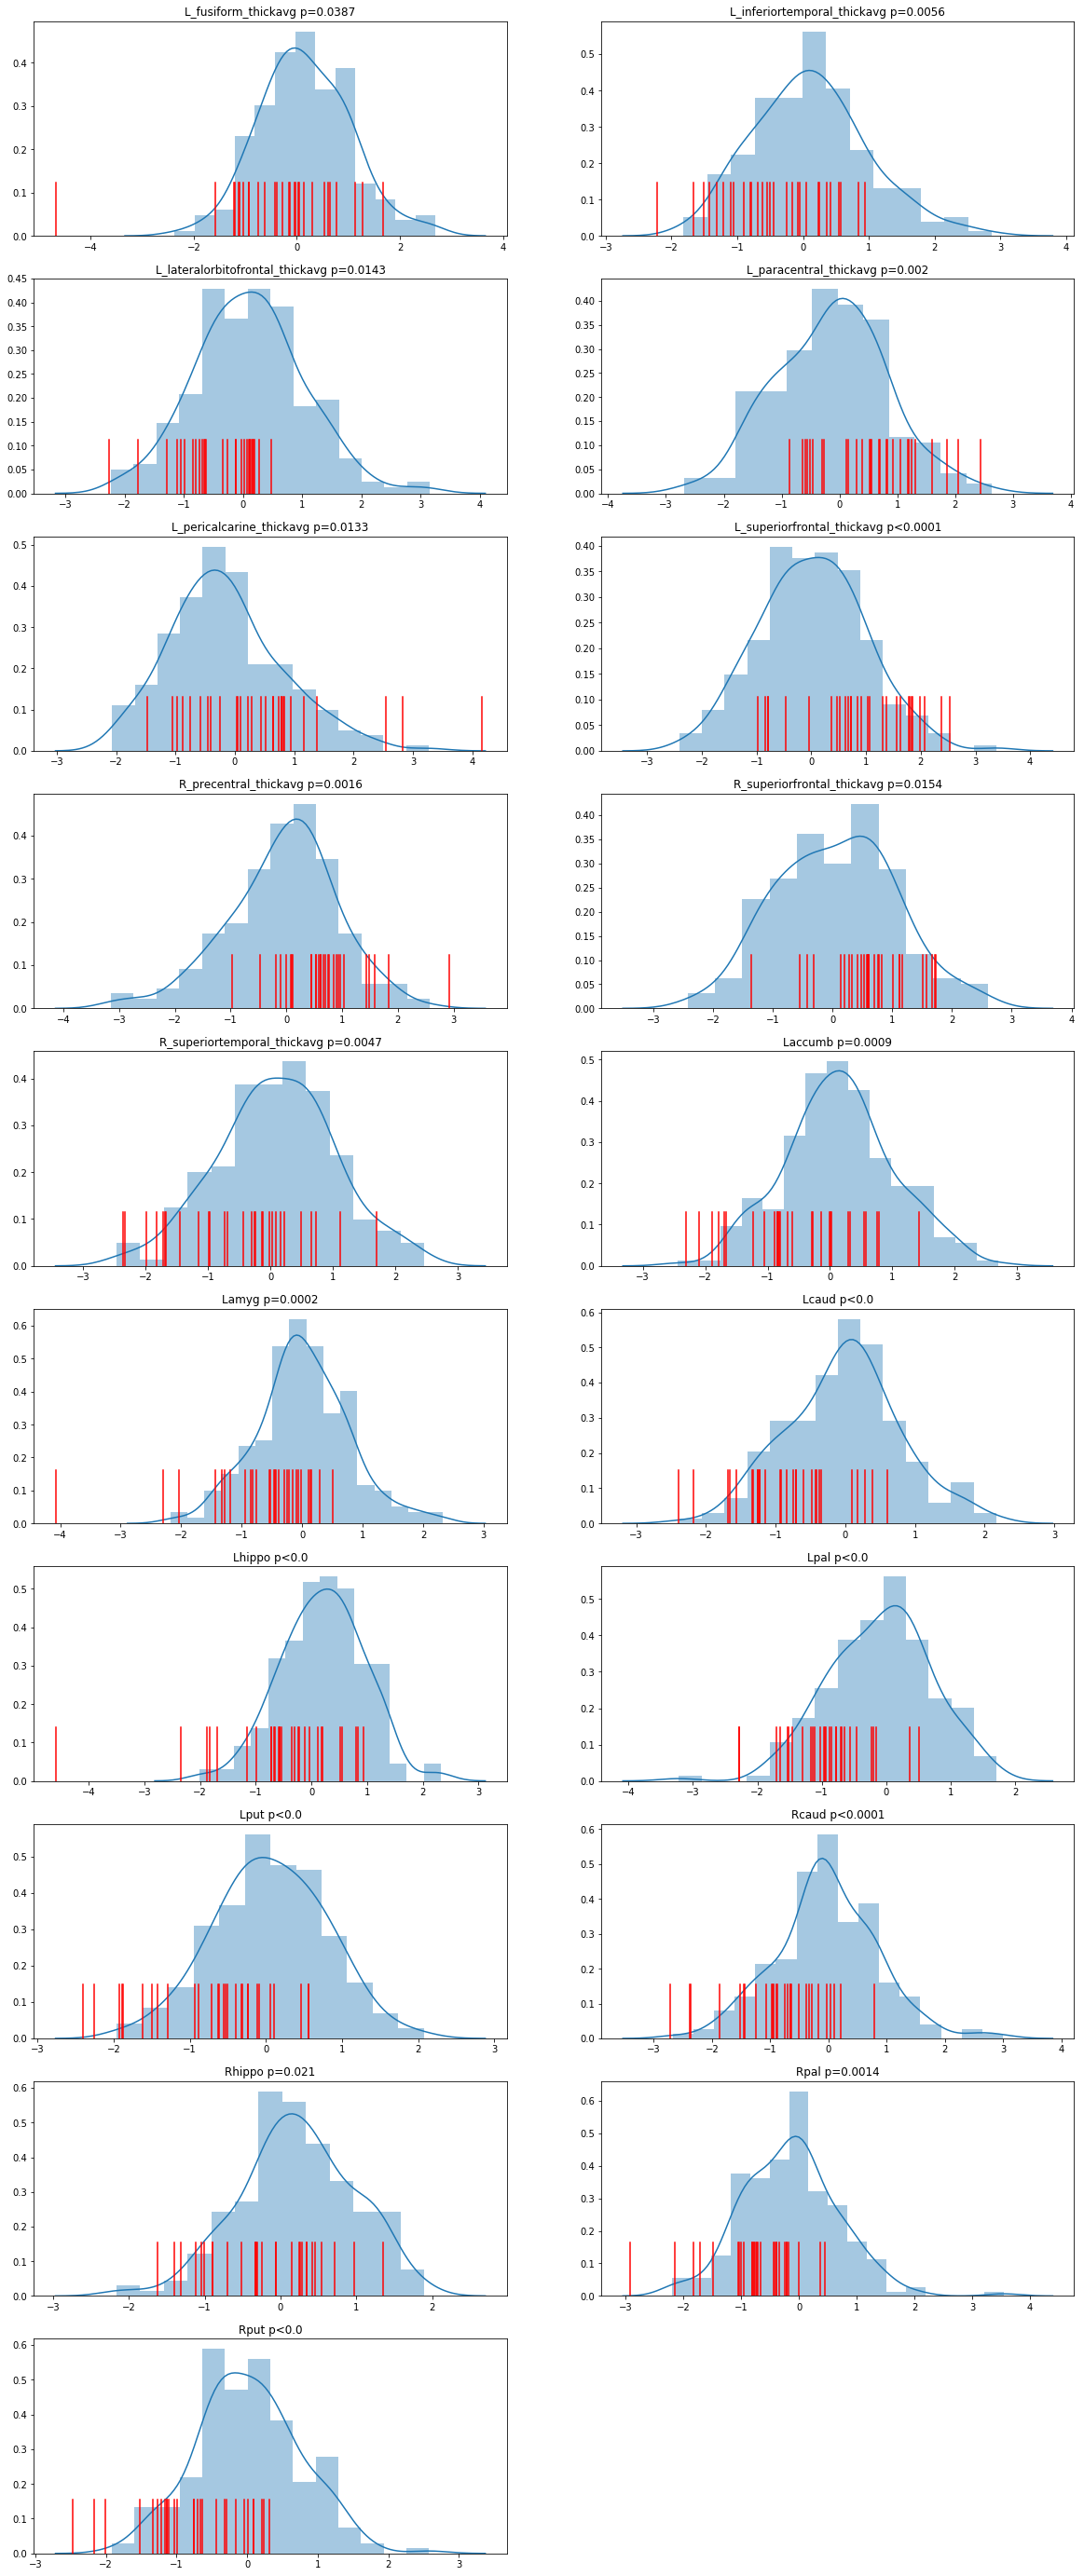

In [27]:
plot_sig_against_norm( Tclabels, all_Tc[np.where(sampleidx==1)[0],:], mdd_ctrl_Tc[np.where(clusassigmdd3==2)[0],:])

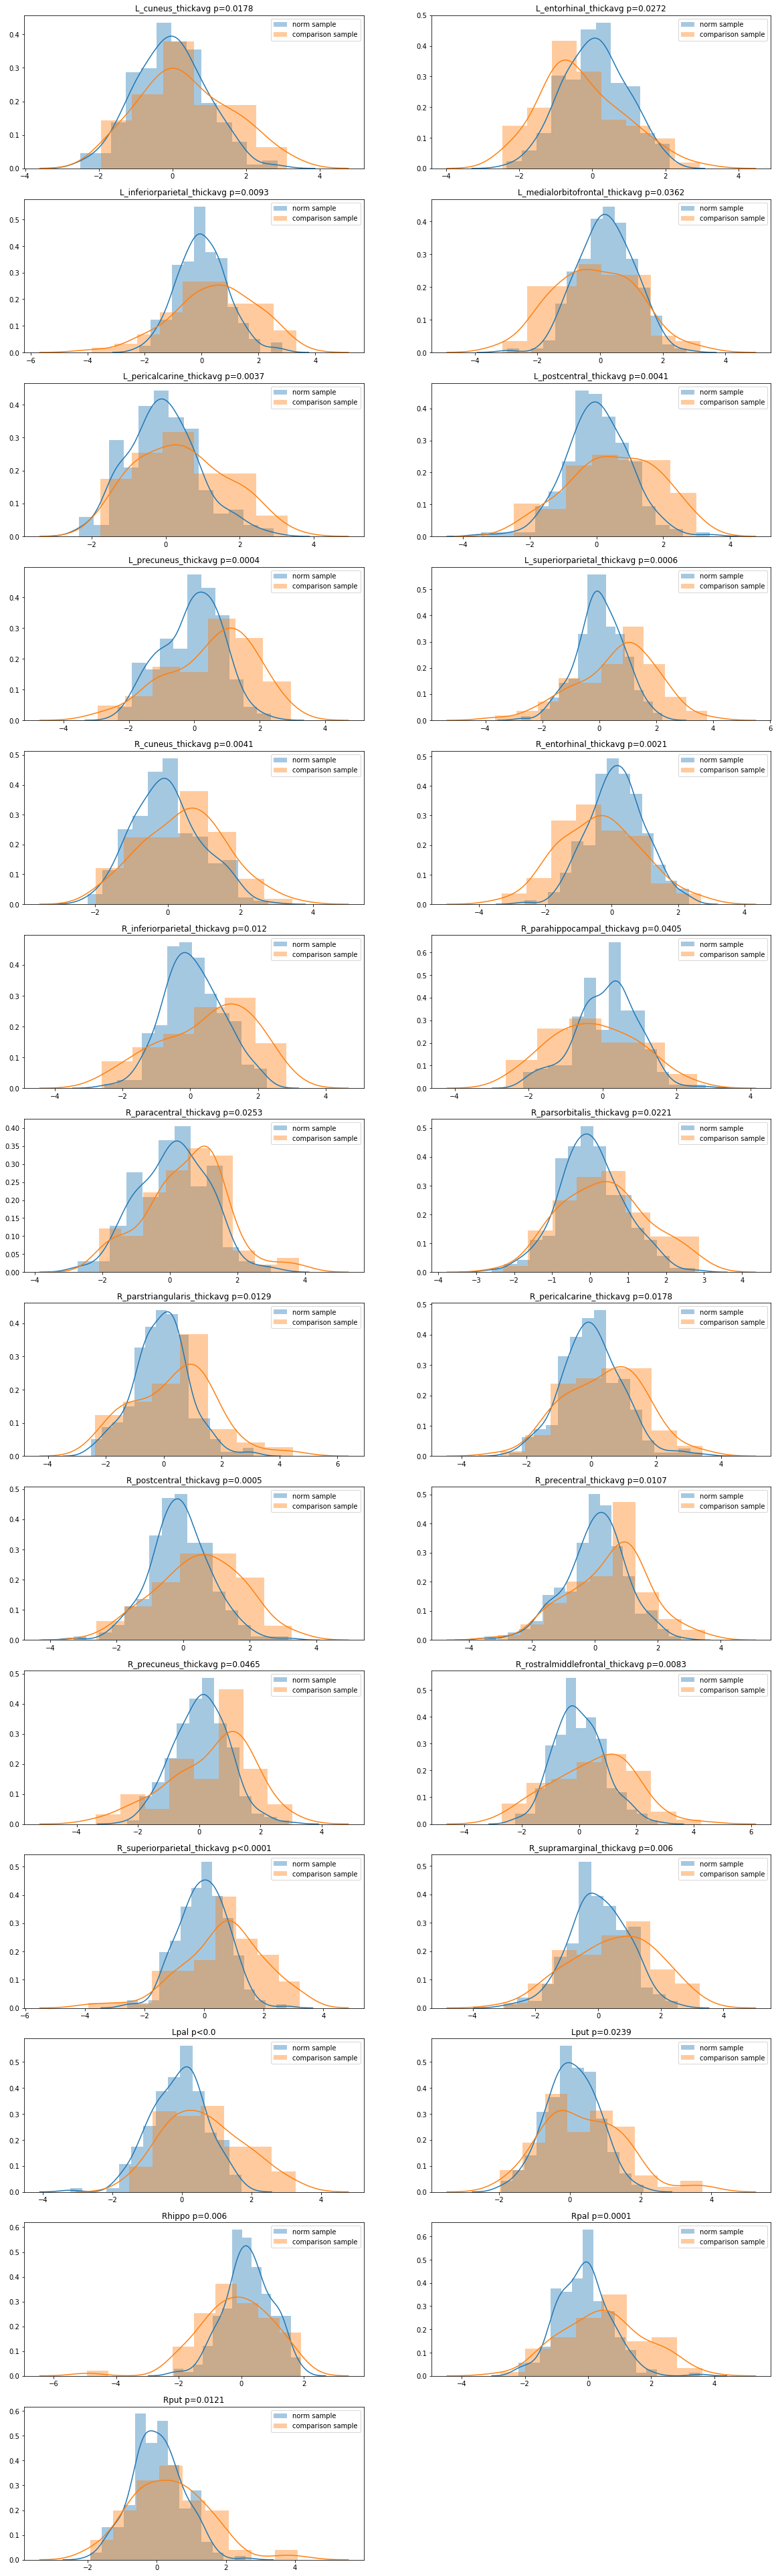

In [33]:
plot_sig_against_norm( Tclabels, all_Tc[np.where(sampleidx==1)[0],:], mdd_ctrl_Tc[np.where(clusassigmdd>0)[0],:])

In [32]:
plot_sig_against_norm( Tclabels, all_Tc[np.where(sampleidx==1)[0],:], mdd_ctrl_Tc[np.where(clusassigmdd==0)[0],:])

no significant differences between samples


In [35]:
# save averages for cluassigmdd
savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/set0_cortthinclus_mddavg.csv', np.mean(mdd_ctrl_Tc[np.where(clusassigmdd==1)[0],:],axis=0), delimiter=',', header='header')
savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/set0_cortthickclus_mddavg.csv', np.mean(mdd_ctrl_Tc[np.where(clusassigmdd==2)[0],:],axis=0), delimiter=',', header='header')

In [179]:
# save averages for cluassigmdd
savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/set6c3_cortthinclus_mddavg.csv', np.mean(mdd_ctrl_Tc[np.where(clusassigmdd3==1)[0],:],axis=0), delimiter=',', header='header')
savetxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/set6c3_cortthickclus_mddavg.csv', np.mean(mdd_ctrl_Tc[np.where(clusassigmdd3==2)[0],:],axis=0), delimiter=',', header='header')

In [71]:
clusassigall=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s0_c4.csv')
conmat = contingency_matrix(clusassigall, sampleidx)
print(conmat)
#['ctrl','mdd','bp','ad','hunt','scz','mci']

[[201 374  19  17   9  34  25]
 [  1   1   0   8  11   0   1]
 [ 10  23   1   1   0   2   2]]


In [77]:
X=mdd_ctrl_Tc[np.where(clusassigmdd>0)[0],:]
Y=clusassigmdd[np.where(clusassigmdd>0)[0]]
f1, prec, rec, accuracy, pred, beta, intercept = classifierMR(X,Y,X,Y,1000)

In [62]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

def new_multiclassifCV(X, y, ncv, nbag):
    kf = KFold(n_splits=ncv, shuffle=True, random_state=None)
    allbetas = []
    allitcpt = []

    ug = np.unique(y)
    if len(ug)==2:
        meanbetas = np.full([ncv,X.shape[1]],np.nan)
        meanitcpt = np.full([ncv],np.nan)
    else:
        meanbetas = np.full([ncv,X.shape[1], len(ug)], np.nan)
        meanitcpt = np.full([ncv,len(ug)], np.nan)

    fold=-1
    for train_index, test_index in kf.split(X):
        fold+=1

        clf = LogisticRegression(random_state=0, multi_class='ovr').fit(X[train_index, :],
                                                                        y[train_index],
                                                                        )

        if nbag==1:
            betas2add = clf.coef_.T
            itcpt2add = clf.intercept_
        else:
            bag_regr = BaggingClassifier(base_estimator=clf, n_estimators=nbag, max_samples=0.66, max_features=1.0,
                                         bootstrap=True, bootstrap_features=False, oob_score=False,
                                         warm_start=False,
                                         n_jobs=None, random_state=None, verbose=0)
            bag_regr.fit(X[train_index, :], y[train_index])
            
            if len(ug)==2:
                betas_all = np.full([X.shape[1], nbag],np.nan)
                itcpt_all = np.full([nbag],np.nan)
                for bag in range(nbag):
                    betas_all[:, bag] = bag_regr.estimators_[bag].coef_[0]
                    itcpt_all[bag] = bag_regr.estimators_[bag].intercept_
                meanbetas[fold,:] = np.nanmedian(betas_all, axis=1)
                meanitcpt[fold] = np.nanmedian(itcpt_all)
            else:
                betas_all = np.full([X.shape[1], len(ug), nbag], np.nan)
                itcpt_all = np.full([len(ug), nbag], np.nan)
                for bag in range(nbag):
                    for c in range(len(ug)):
                        betas_all[:, c, bag] = bag_regr.estimators_[bag].coef_[c]
                        itcpt_all[c, bag] = bag_regr.estimators_[bag].intercept_[c]
                meanbetas[fold,:,:] = np.nanmedian(betas_all, axis=2)
                meanitcpt[fold,:] = np.nanmedian(itcpt_all, axis=1)


    return np.nanmedian(meanbetas, axis=0), np.nanmedian(meanitcpt, axis=0)

def asscert(trainproba):
    assig = np.full([trainproba.shape[0]],np.nan)
    cert = np.full([trainproba.shape[0]],np.nan)
    for n in range(trainproba.shape[0]):
        assig[n]=np.where(trainproba[n,:]==np.max(trainproba[n,:]))[0]
        cert[n]=trainproba[n,assig[n].astype(int)]
    return assig, cert

In [111]:
with open((mdd_datadir + sets[0] + '_ctrl.csv'), "r") as f:
    mdd_ctrl_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
clusassigmdd=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_mddctrl_s0_c3.csv')

X=mdd_ctrl_Tc#[np.where(clusassigmdd>0)[0],:]
Y=clusassigmdd#[np.where(clusassigmdd>0)[0]]
betas, itcpt = new_multiclassifCV(X, Y, 5, 1000)

In [118]:
with open((all_savedir + sets[0] + '_ctrl.csv'), "r") as f:
    all_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
savedir = '/Users/lee_jollans/Projects/clustering_pilot/IXI/'
with open((savedir + 'IXI2_Tc.csv'), "r") as f:
    ixi_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
    
ibetas=np.append(np.expand_dims(itcpt, axis=1).T, betas,axis=0)
trainprob1, testprobmdd1 = get_proba(X, Y, ibetas, mdd_ctrl_Tc)
trainprob1, testproball1 = get_proba(X, Y, ibetas, all_Tc)
trainprob1, testprobixi1 = get_proba(X, Y, ibetas, ixi_Tc)
trainprob1, testproballhc1 = get_proba(X, Y, ibetas, all_Tc[np.where(sampleidx==1)[0],:])

assigmdd1, certmdd1 = asscert(trainprob1)
assigall1, certall1 = asscert(testproball1)
assigixi1, certixi1 = asscert(testprobixi1)
assigallhc1, certallhc1 = asscert(testproballhc1)

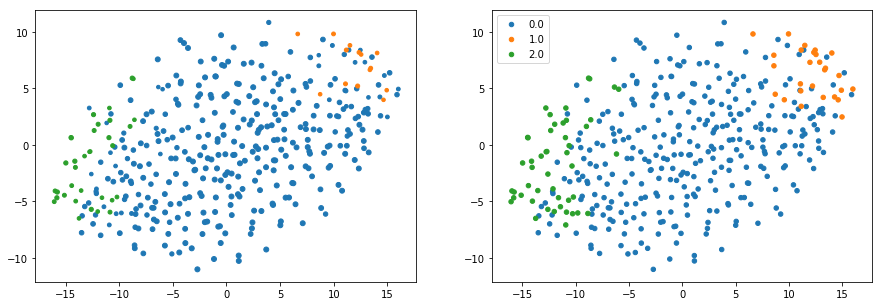

In [115]:
assigmdd, certmdd = asscert(trainprob)
mdd_ctrl_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(mdd_ctrl_Tc)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
colorscatter(mdd_ctrl_tsne, assigmdd1, certmdd1*5, ax1, 1)
colorscatter(mdd_ctrl_tsne, clusassigmdd, np.ones(398)*4, ax2, 1)
plt.show()

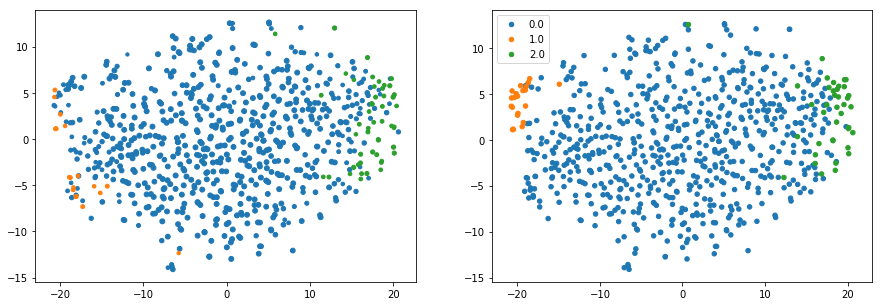

In [116]:
clusassigall=np.loadtxt('/Users/lee_jollans/Projects/clustering_pilot/clusteringpaper/cluslabels_all_s0_c4.csv')

assigall, certall = asscert(testprob)
all_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(all_Tc)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[15,5])
colorscatter(all_tsne, assigall1, certall1*5, ax1, 1)
colorscatter(all_tsne, clusassigall, np.ones(740)*4, ax2, 1)
plt.show()

In [119]:
print(np.nanmean(trainprob1,axis=0))
print(np.nanmean(testprobixi1,axis=0))
print(np.nanmean(testproball1,axis=0))
print(np.nanmean(testproballhc1,axis=0))

[0.83236655 0.06417969 0.10345377]
[0.83454796 0.05805405 0.10739799]
[0.83338524 0.06230584 0.10430891]
[0.86453546 0.03469549 0.10076905]


In [145]:
clin['no cluster likelihood']=trainprob1[:,0]
clin['Cortical thinning cluster likelihood']=trainprob1[:,1]
clin['Cortical thickening cluster likelihood']=trainprob1[:,2]

N=323, r=0.07534907281533786
N=398, r=-0.057902091868291136
N=323, r=-0.2418589468161143
N=323, r=0.2605371146987132
N=398, r=0.08257381573567908
N=323, r=-0.21570666832909302
N=323, r=-0.22292749911021653
N=398, r=0.003505331627313915
N=323, r=0.3686795867937085
N1=14, N2=40
Ttest_indResult(statistic=3.490393948588851, pvalue=0.0009918546354403196)
N1=27, N2=48
Ttest_indResult(statistic=0.7708875435132054, pvalue=0.4432615450517631)
N1=14, N2=40
Ttest_indResult(statistic=-5.412721001213283, pvalue=1.6004975654822691e-06)


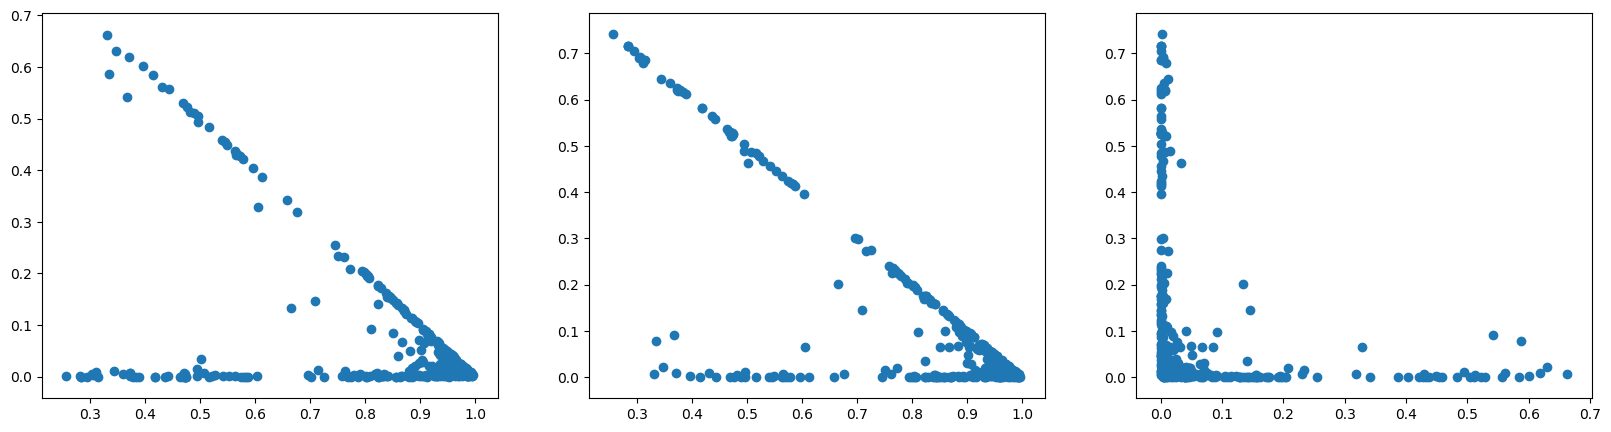

In [348]:
for n in range(3):
    corrwithnans(clin['brainage'].to_numpy(),trainprob1[:,n])
    corrwithnans(clin['consensusage_pheno'].to_numpy(),trainprob1[:,n])
    corrwithnans(clin['brainPAD'].to_numpy(),trainprob1[:,n])
brainage=clin['brainage'].to_numpy()
age=clin['consensusage_pheno'].to_numpy()
brainpad=clin['brainPAD'].to_numpy()

ttestwithnans(brainage[np.where(clusassigmdd==1)[0]],brainage[np.where(clusassigmdd==2)[0]])
ttestwithnans(age[np.where(clusassigmdd==1)[0]],age[np.where(clusassigmdd==2)[0]])
ttestwithnans(brainpad[np.where(clusassigmdd==1)[0]],brainpad[np.where(clusassigmdd==2)[0]])


In [350]:
Xinit = pd.read_csv(r'/Users/lee_jollans/Projects/MARS_GSK_project/data/alldatacollect/controldata.csv');
ctrlbrainage = Xinit['brainage'].to_numpy()
ctrlage = Xinit['consensusage_pheno'].to_numpy()
ctrlbrainpad = Xinit['brainage'].to_numpy()-Xinit['consensusage_pheno'].to_numpy()
for n in range(3):
    corrwithnans(ctrlbrainage,testproballhc1[:,n])
    corrwithnans(ctrlbrainpad,testproballhc1[:,n])
    

N=207, r=0.11599699458072084
N=207, r=0.18540348423937283
N=207, r=0.20377658253040987
N=207, r=0.18321767066500894
N=207, r=-0.20429322201179814
N=207, r=-0.262276459176257


In [142]:
# add all the probabilities etc to a dataframe
dfproba = pd.DataFrame({}, columns=['dataset', 'label', 'assig', 'certmax', 'likelihood', 'cluster'])
for c in range(3):
    df1= pd.DataFrame({'dataset': ['mdd']*398,
                       'label': ['mdd']*398,
                       'assig': assigmdd1,
                       'certmax': certmdd1,
                       'likelihood': trainprob1[:,c],
                       'cluster': np.ones(shape=[398])*c},
                      columns=['dataset', 'label', 'assig', 'certmax', 'likelihood', 'cluster'])
    dfproba = dfproba.append(df1)
    df2= pd.DataFrame({'dataset': ['ixi']*544,
                       'label': ['hc']*544,
                       'assig': assigixi1,
                       'certmax': certixi1,
                       'likelihood': testprobixi1[:,c],
                       'cluster': np.ones(shape=[544])*c},
                      columns=['dataset', 'label', 'assig', 'certmax', 'likelihood', 'cluster'])
    dfproba = dfproba.append(df2)
    df3= pd.DataFrame({'dataset': ['all']*212,
                       'label': ['hc']*212,
                       'assig': assigallhc1,
                       'certmax': certallhc1,
                       'likelihood': testproballhc1[:,c],
                       'cluster': np.ones(shape=[212])*c},
                      columns=['dataset', 'label', 'assig', 'certmax', 'likelihood', 'cluster'])
    dfproba = dfproba.append(df3)

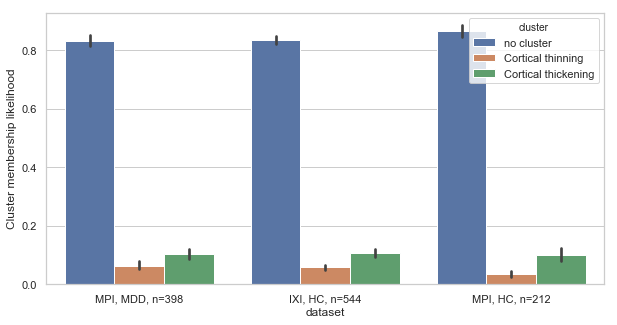

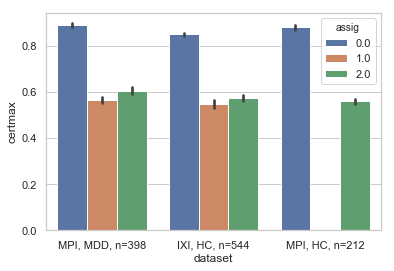

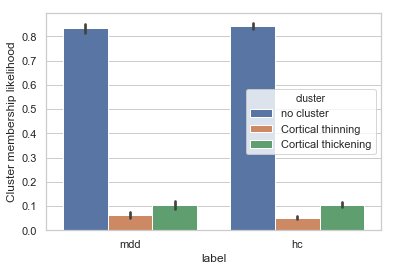

In [143]:
import seaborn as sns
dfproba['Cluster membership likelihood']= dfproba['likelihood']
dfproba['cluster']=dfproba['cluster'].replace({0: 'no cluster',1: 'Cortical thinning',2: 'Cortical thickening'})
dfproba['dataset']=dfproba['dataset'].replace({'mdd': 'MPI, MDD, n=398','ixi': 'IXI, HC, n=544','all': 'MPI, HC, n=212'})

sns.set(style="whitegrid")
fig = plt.figure(figsize=[10,5])
plt.subplot(1,1,1); sns.barplot(x="dataset", y="Cluster membership likelihood",hue='cluster' ,data=dfproba)
plt.show()
ax = sns.barplot(x="dataset", y="certmax",hue='assig' ,data=dfproba)
plt.show()
ax = sns.barplot(x="label", y="Cluster membership likelihood",hue='cluster' ,data=dfproba)
plt.show()

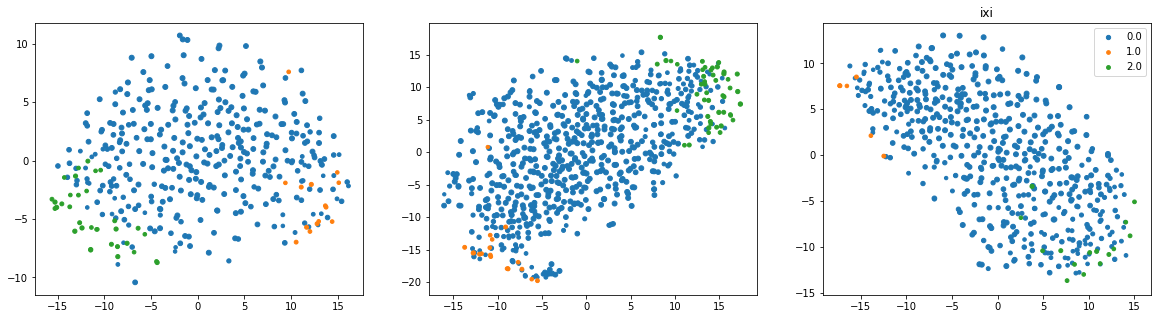

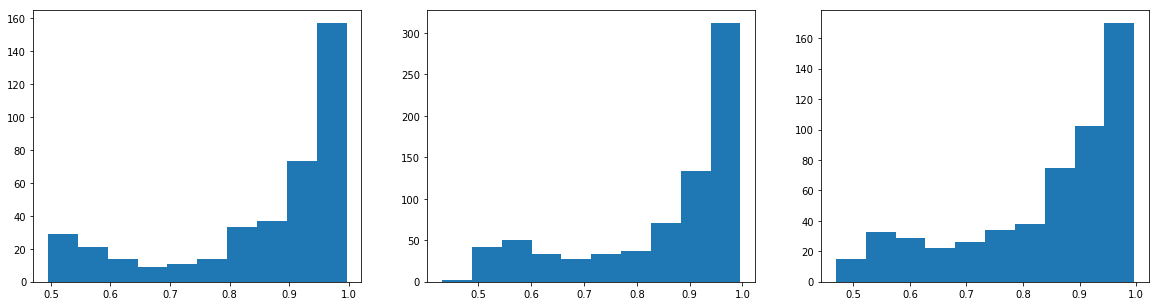

In [108]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
colorscatter(mdd_ctrl_tsne, assigmdd1, (certmdd1)*5, ax1, 1); plt.title('mdd')
colorscatter(all_tsne, assigall1, (certall1)*5, ax2, 1); plt.title('all')
colorscatter(ixi_tsne, assigixi1, (certixi1)*5, ax3, 1);  plt.title('ixi')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
ax1.hist(certmdd1)
ax2.hist(certall1)
ax3.hist(certixi1)
plt.show()

In [69]:
print('all controls:' , [len(np.where(assigall[np.where(sampleidx==1)[0]]==i)[0]) for i in range(3)])
print('all MDD:' , [len(np.where(assigall[np.where(sampleidx==2)[0]]==i)[0]) for i in range(3)])
print('all BP:' , [len(np.where(assigall[np.where(sampleidx==3)[0]]==i)[0]) for i in range(3)])
print('all SCZ:' , [len(np.where(assigall[np.where(sampleidx==6)[0]]==i)[0]) for i in range(3)])
print('all MCI:' , [len(np.where(assigall[np.where(sampleidx==7)[0]]==i)[0]) for i in range(3)])
print('all AD:' , [len(np.where(assigall[np.where(sampleidx==4)[0]]==i)[0]) for i in range(3)])
print('all HUNT:' , [len(np.where(assigall[np.where(sampleidx==5)[0]]==i)[0]) for i in range(3)])

#['ctrl','mdd','bp','ad','hunt','scz','mci']

all controls: [204, 0, 8]
all MDD: [351, 11, 36]
all BP: [19, 1, 0]
all SCZ: [32, 0, 4]
all MCI: [26, 0, 2]
all AD: [20, 5, 1]
all HUNT: [18, 2, 0]


In [74]:
# now do just a binary classification 
X=mdd_ctrl_Tc[np.where(clusassigmdd>0)[0],:]
Y=clusassigmdd[np.where(clusassigmdd>0)[0]]
betas2, itcpt2 = new_multiclassifCV(X, Y, 5, 1000)

IndexError: too many indices for array

In [83]:
ibetas=np.expand_dims(np.append(np.expand_dims(itcpt2, axis=1).T, betas2,axis=0),axis=1)
ibetas=np.append(ibetas,ibetas,axis=1)
trainprob, testprobmdd = get_proba(X, Y, ibetas, mdd_ctrl_Tc)
trainprob, testproball = get_proba(X, Y, ibetas, all_Tc)
trainprob, testprobixi = get_proba(X, Y, ibetas, ixi_Tc)
assigmdd2, certmdd2 = asscert(testprobmdd)
assigall2, certall2 = asscert(testproball)
assigixi2, certixi2 = asscert(testprobixi)

In [101]:
print(np.nanmin(certmdd2[np.where(clusassigmdd==1)[0]]))
print(np.nanmin(certmdd2[np.where(clusassigmdd==2)[0]]))

0.7097837145324833
0.7631180337030843


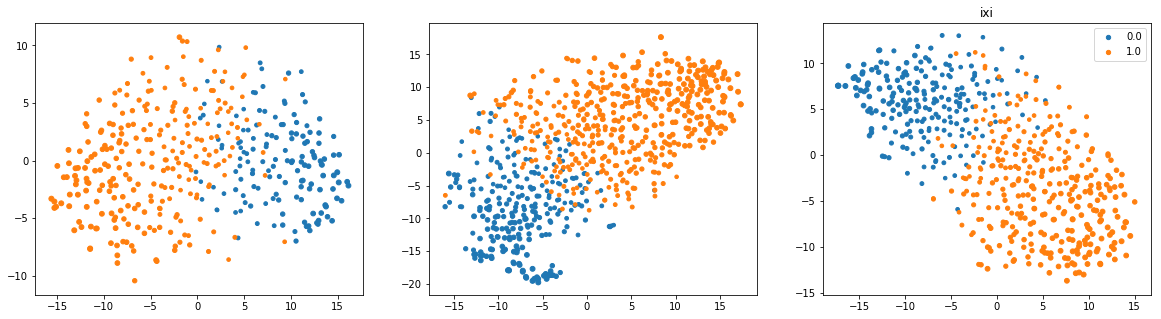

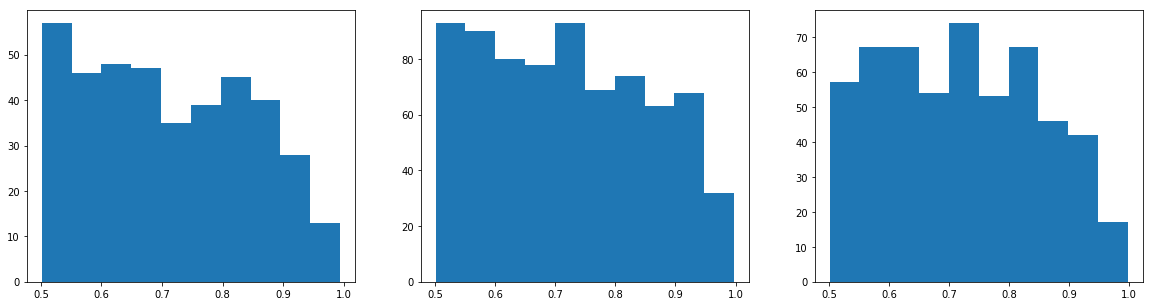

In [87]:
assigmdd2, certmdd2 = asscert(testprobmdd)
assigall2, certall2 = asscert(testproball)
assigixi2, certixi2 = asscert(testprobixi)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
colorscatter(mdd_ctrl_tsne, assigmdd2, (certmdd2)*5, ax1, 1); plt.title('mdd')
colorscatter(all_tsne, assigall2, (certall2)*5, ax2, 1); plt.title('all')
colorscatter(ixi_tsne, assigixi2, (certixi2)*5, ax3, 1);  plt.title('ixi')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
ax1.hist(certmdd2)
ax2.hist(certall2)
ax3.hist(certixi2)
plt.show()

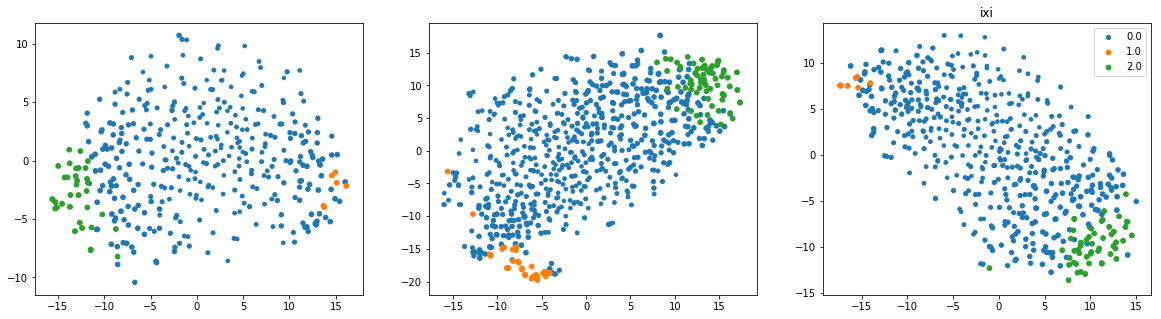

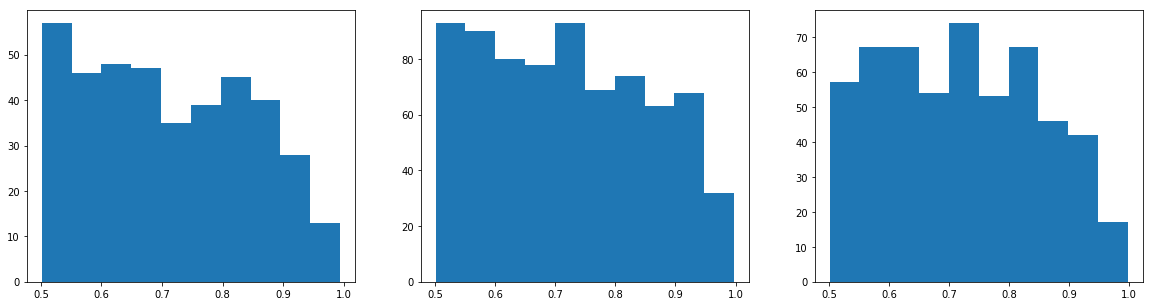

mdd: [358, 6, 34]
all: [644, 31, 65]
ixi: [486, 8, 50]
all controls: [189, 3, 20]


In [104]:
assigmdd2, certmdd2 = asscert(testprobmdd)
assigall2, certall2 = asscert(testproball)
assigixi2, certixi2 = asscert(testprobixi)

limit=.90

assigmdd2=assigmdd2+1
assigmdd2[np.where(certmdd2<limit)[0]]=0
assigall2=assigall2+1
assigall2[np.where(certall2<limit)[0]]=0
assigixi2=assigixi2+1
assigixi2[np.where(certixi2<limit)[0]]=0
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
colorscatter(mdd_ctrl_tsne, assigmdd2, (certmdd2)*5, ax1, 1); plt.title('mdd')
colorscatter(all_tsne, assigall2, (certall2)*5, ax2, 1); plt.title('all')
colorscatter(ixi_tsne, assigixi2, (certixi2)*5, ax3, 1);  plt.title('ixi')
plt.show()
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[20,5])
ax1.hist(certmdd2)
ax2.hist(certall2)
ax3.hist(certixi2)
plt.show()

print('mdd:' , [len(np.where(assigmdd2==i)[0]) for i in range(3)])
print('all:' , [len(np.where(assigall2==i)[0]) for i in range(3)])
print('ixi:' , [len(np.where(assigixi2==i)[0]) for i in range(3)])
print('all controls:' , [len(np.where(assigall2[np.where(sampleidx==1)[0]]==i)[0]) for i in range(3)])

In [92]:
allY=all_Tc.dot(beta)+intercept
print([np.nanmean(allY[np.where(sampleidx==i+1)]) for i in range(7)])
#['ctrl','mdd','bp','ad','hunt','scz','mci']

[0.5276884141788039, 0.5756573240786923, 0.14181689521821755, -4.748129772686159, -9.190704359655564, 0.2424570167950015, -0.1809618093138611]


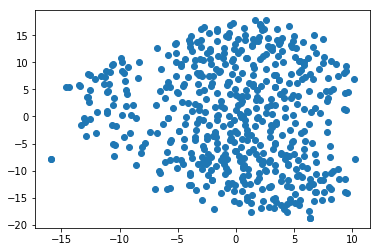

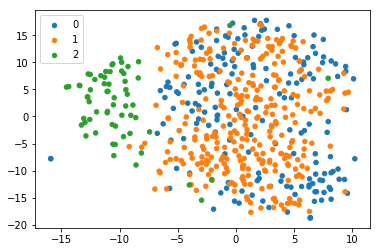

In [4]:
# tsne to check for henkel
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sys
sys.path.append('/Users/lee_jollans/PycharmProjects/mdd_clustering/cv_clustering')
from cv_clustering.utils import colorscatter

savedir = '/Users/lee_jollans/Projects/clustering_pilot/IXI/'
with open((savedir + 'IXI_Tc.csv'), "r") as f:
    ixi_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
ixi_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(ixi_Tc)
plt.scatter(ixi_tsne[:,0],ixi_tsne[:,1]); plt.show()

savedir = '/Users/lee_jollans/Projects/clustering_pilot/IXI/'
ixi_sitelist = pd.read_csv(savedir + '/SiteIXI_Lee.txt', delimiter = '\t')
s3 = pd.read_csv('/Users/lee_jollans/Projects/clustering_pilot/ixi_s3_outliers_nans_removed.csv')
s3 = s3.rename(columns={"eTIV": "ICV", "Ethnicity": "site_pheno"})
res=s3.merge(ixi_sitelist, left_on='ALL_IDs', right_on='SubjID')
sitesort = res['SITE'].to_numpy()

fig=plt.figure()
ax=plt.subplot(1,1,1)
colorscatter(ixi_tsne, sitesort, np.ones(shape=[544,1])*4, ax, 1)

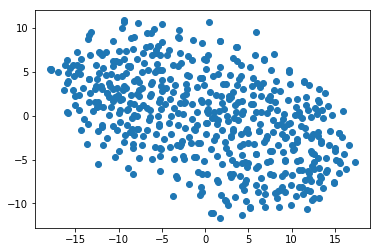

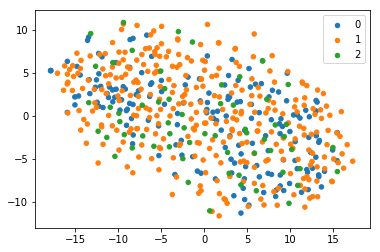

In [5]:
savedir = '/Users/lee_jollans/Projects/clustering_pilot/IXI/'
with open((savedir + 'IXI2_Tc.csv'), "r") as f:
    ixi_Tc = np.array(list(csv.reader(f, delimiter=","))).astype(float)
ixi_tsne=TSNE(n_components=2, perplexity=30, early_exaggeration=1, learning_rate=2, n_iter=1000).fit_transform(ixi_Tc)
plt.scatter(ixi_tsne[:,0],ixi_tsne[:,1]); plt.show()

savedir = '/Users/lee_jollans/Projects/clustering_pilot/IXI/'
ixi_sitelist = pd.read_csv(savedir + '/SiteIXI_Lee.txt', delimiter = '\t')
s3 = pd.read_csv('/Users/lee_jollans/Projects/clustering_pilot/ixi_s3_outliers_nans_removed.csv')
s3 = s3.rename(columns={"eTIV": "ICV", "Ethnicity": "site_pheno"})
res=s3.merge(ixi_sitelist, left_on='ALL_IDs', right_on='SubjID')
sitesort = res['SITE'].to_numpy()

fig=plt.figure()
ax=plt.subplot(1,1,1)
colorscatter(ixi_tsne, sitesort, np.ones(shape=[544,1])*4, ax, 1)

In [ ]:
# ixi problem solved! now apply the mdd classifier to them


In [ ]:
# load in epigenetic age
/Users/lee_jollans/Projects/MARS_GSK_project/data/alldatacollect/epigenetic_age_data_N627_100119.csv'